## This project demonstrates advanced time series forecasting techniques applied to Bitcoin price data.
####  We use historical BTC price data to forecast future trends and simulate price paths using Monte Carlo simulations.

##**Project Highlights:**
####  - Time series forecasting with Facebook Prophet
####  - Monte Carlo simulations for risk assessment
####  - Data visualization and uncertainty quantification
####  - Practical applications in cryptocurrency trading

## **Why It Matters:**
####  Financial markets are uncertain, and traders need probabilistic models to assess risk.
####  By combining Prophet and Monte Carlo simulations, we obtain a realistic price range rather than a single deterministic forecast.

## **How to Use:**
####  - Load historical price data (BTC or any asset)
####  - Train the Prophet model and generate forecasts
####  - Simulate possible price paths with Monte Carlo methods
####  - Analyze the distribution of future prices for better decision-making

## **Potential Improvements:**
####  - Incorporating external factors (e.g., Google Trends, on-chain metrics)
####  - Applying deep learning models (LSTM, Transformer) for improved accuracy
####  - Comparing forecasting methods (ARIMA, XGBoost, Neural Networks)

## 1. Introduction
This project explores various time series forecasting techniques for Bitcoin (BTC) prices, including traditional statistical methods, machine learning models, and simulation-based approaches.

## 2. Exploratory Data Analysis (EDA)
This section examines historical BTC price trends and trading volume using various visualizations.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Read BTC data into a Pandas DataFrame

df=pd.read_csv("BTC-USD.csv")

In [0]:
import pandas as pd

# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Set 'Date' as index but keep it as a regular column as well
df.set_index("Date", inplace=True, drop=False)

# Check the result
print(df.head())


                 Date          Open  ...         Close       Volume
Date                                 ...                           
2022-01-02 2022-01-02  47680.925781  ...  47345.218750  27951569547
2022-01-03 2022-01-03  47343.542969  ...  46458.117188  33071628362
2022-01-04 2022-01-04  46458.851563  ...  45897.574219  42494677905
2022-01-05 2022-01-05  45899.359375  ...  43569.003906  36851084859
2022-01-06 2022-01-06  43565.511719  ...  43160.929688  30208048289

[5 rows x 6 columns]


In [0]:
display(df)

Date,Open,High,Low,Close,Volume
2022-01-02T00:00:00.000Z,47680.925781,47881.40625,46856.9375,47345.21875,27951569547
2022-01-03T00:00:00.000Z,47343.542969,47510.726563,45835.964844,46458.117188,33071628362
2022-01-04T00:00:00.000Z,46458.851563,47406.546875,45752.464844,45897.574219,42494677905
2022-01-05T00:00:00.000Z,45899.359375,46929.046875,42798.222656,43569.003906,36851084859
2022-01-06T00:00:00.000Z,43565.511719,43748.71875,42645.539063,43160.929688,30208048289
2022-01-07T00:00:00.000Z,43153.570313,43153.570313,41077.445313,41557.902344,84196607520
2022-01-08T00:00:00.000Z,41561.464844,42228.941406,40672.277344,41733.941406,28066355845
2022-01-09T00:00:00.000Z,41734.726563,42663.949219,41338.160156,41911.601563,21294384372
2022-01-10T00:00:00.000Z,41910.230469,42199.484375,39796.570313,41821.261719,32104232331
2022-01-11T00:00:00.000Z,41819.507813,43001.15625,41407.753906,42735.855469,26327648900


### 2.1. Candlestick Chart
A candlestick chart is plotted to visualize BTC price movement and volatility over time.
It helps identify trends, reversals, and significant market activity.


In [0]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(
    x=df.index,
    open=df["Open"],
    high=df["High"],
    low=df["Low"],
    close=df["Close"],
    name="BTC Price"
)])

fig.update_layout(
    title="BTC/USD Candlestick Chart",
    xaxis_title="Date",
    yaxis_title="Price (USD)",
    xaxis_rangeslider_visible=False
)

fig.show()


### 2.2. Moving Averages (SMA & EMA)

The Simple Moving Average (SMA) and Exponential Moving Average (EMA) are used to smooth out price fluctuations and highlight trends.
SMA considers equal weight for all past values, while EMA gives more importance to recent prices.

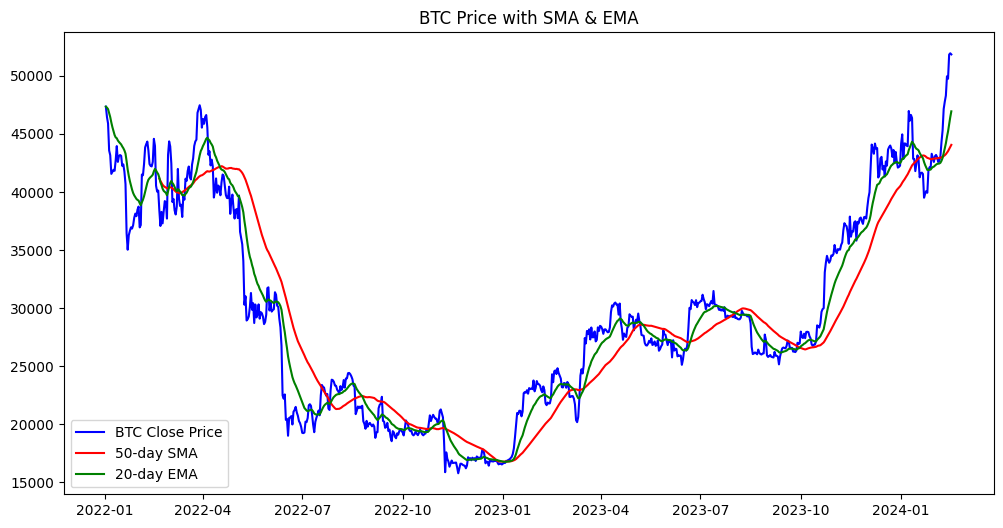

In [0]:
df["SMA_50"] = df["Close"].rolling(window=50).mean()
df["EMA_20"] = df["Close"].ewm(span=20, adjust=False).mean()

plt.figure(figsize=(12,6))
plt.plot(df.index, df["Close"], label="BTC Close Price", color="blue")
plt.plot(df.index, df["SMA_50"], label="50-day SMA", color="red")
plt.plot(df.index, df["EMA_20"], label="20-day EMA", color="green")
plt.legend()
plt.title("BTC Price with SMA & EMA")
plt.show()


###2.3. BTC Trading Volume Over Time
This visualization explores periods of high and low market activity.
Helps analyze whether high volume correlates with significant price movements.


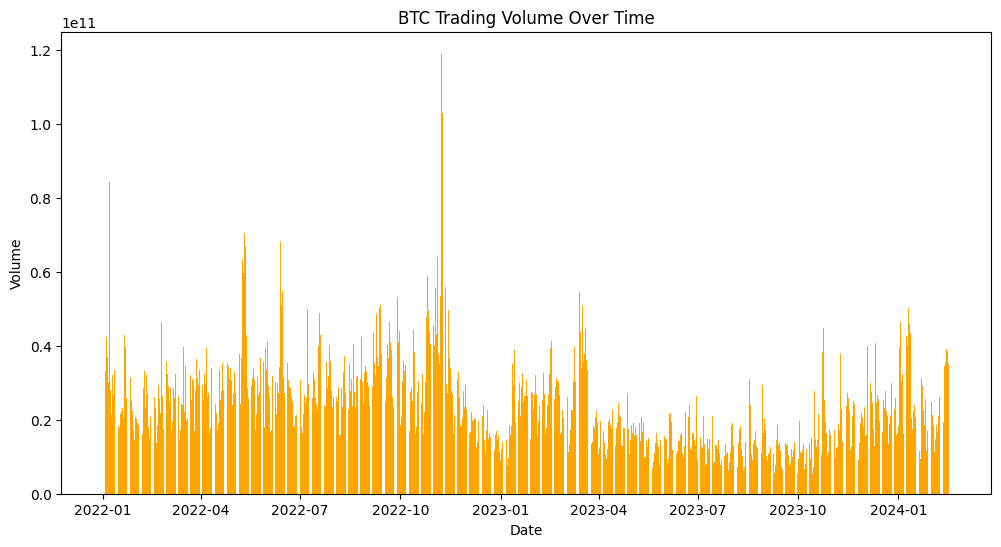

In [0]:
plt.figure(figsize=(12,6))
plt.bar(df.index, df["Volume"], color="orange")
plt.title("BTC Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()


###2.4. Correlation Between Price & Volume

A correlation analysis is performed between BTC price and trading volume.

This helps understand whether volume spikes indicate bullish or bearish trends.

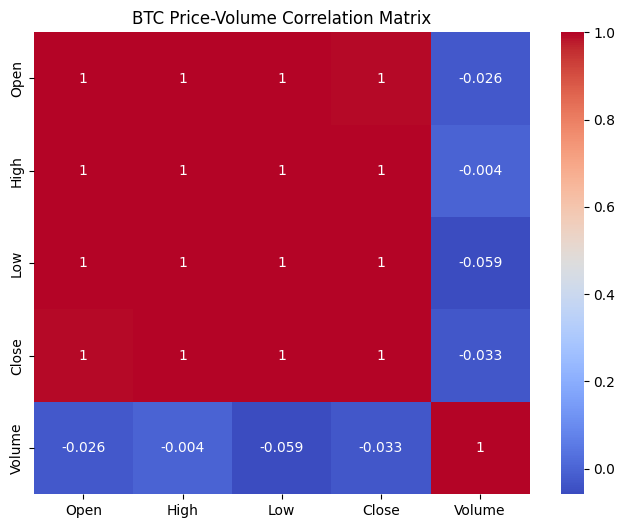

In [0]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df[["Open", "High", "Low", "Close", "Volume"]].corr(), annot=True, cmap="coolwarm")
plt.title("BTC Price-Volume Correlation Matrix")
plt.show()


## 3. Time Series Forecasting Models
This section implements various forecasting models, comparing their effectiveness in predicting BTC prices.



## 3.1. ARIMA (Autoregressive Integrated Moving Average)
A classical time series forecasting method that models price trends based on past values and error terms.
Requires data stationarity, so differencing is applied if necessary.

In [0]:
pip install pmdarima 

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


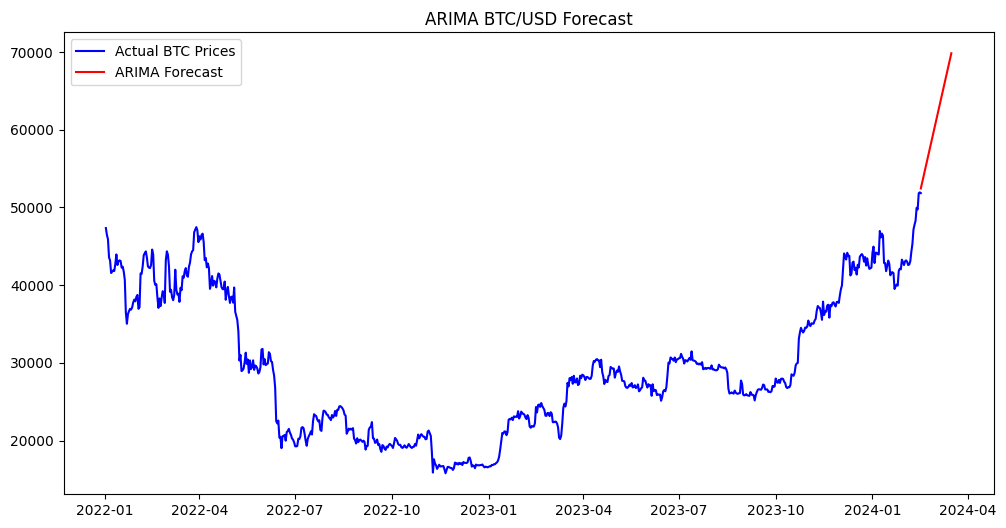

In [0]:

import pmdarima as pm
import matplotlib.pyplot as plt

# Fit Auto-ARIMA model
model_arima = pm.auto_arima(df["Close"], seasonal=False, stepwise=True, suppress_warnings=True)

# Forecast 30 days ahead
forecast_arima = model_arima.predict(n_periods=30)

# Plot Forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Actual BTC Prices", color="blue")
plt.plot(pd.date_range(df.index[-1], periods=30, freq="D"), forecast_arima, label="ARIMA Forecast", color="red")
plt.legend()
plt.title("ARIMA BTC/USD Forecast")
plt.show()


## 3.2. SARIMA (Seasonal ARIMA)
Extends ARIMA by incorporating seasonality components.
Useful for detecting patterns that repeat over specific intervals.

/databricks/python/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/databricks/python/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/databricks/python/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/databricks/python/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.32850D+00    |proj g|=  1.78352D-01

At iterate    5    f=  8.30782D+00    |proj g|=  2.60086D-02

At iterate   10    f=  8.30346D+00    |proj g|=  1.59343D-03

At iterate   15    f=  8.30344D+00    |proj g|=  1.82708D-03

At iterate   20    f=  8.30236D+00    |proj g|=  3.70250D-03

At iterate   25    f=  8.28388D+00    |proj g|=  9.48471D-02
  ys=-3.048E-01  -gs= 3.885E-02 BFGS update SKIPPED
  ys=-6.513E-08  -gs= 3.199E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


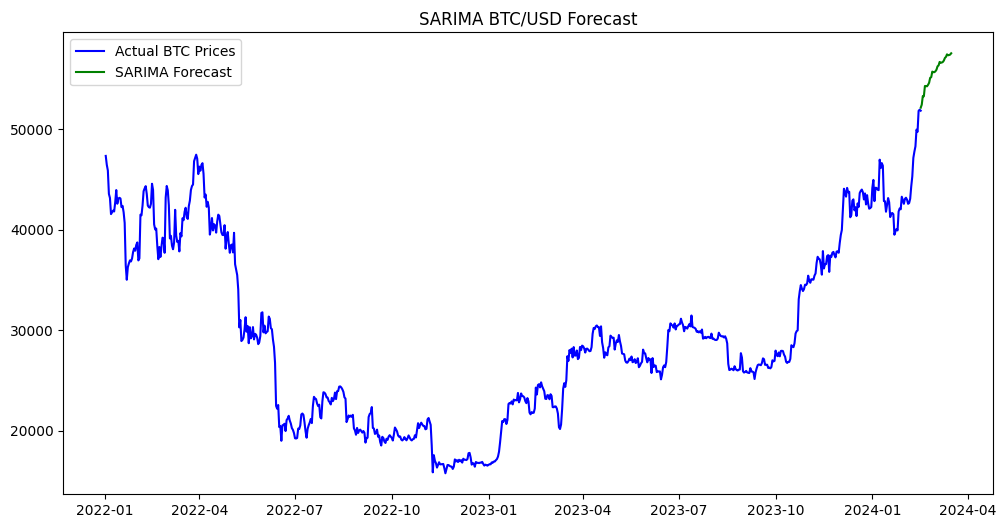

In [0]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA model (assuming weekly seasonality)
model_sarima = SARIMAX(df["Close"], order=(1,1,1), seasonal_order=(1,1,1,7))
sarima_fit = model_sarima.fit()

# Forecast 30 days ahead
forecast_sarima = sarima_fit.forecast(steps=30)

# Plot Forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Actual BTC Prices", color="blue")
plt.plot(pd.date_range(df.index[-1], periods=30, freq="D"), forecast_sarima, label="SARIMA Forecast", color="green")
plt.legend()
plt.title("SARIMA BTC/USD Forecast")
plt.show()


### 3.3. SARIMAX (SARIMA with Exogenous Variables)
Enhances SARIMA by including external variables (e.g., BTC trading volume) as regressors.
Helps improve forecast accuracy by leveraging additional market data.

/databricks/python/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/databricks/python/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/databricks/python/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/databricks/python/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.32831D+00    |proj g|=  2.07548D+08


/databricks/python/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      1     21      1     0     0   2.075D+08   8.328D+00
  F =   8.3283129849179307     

ABNORMAL_TERMINATION_IN_LNSRCH                              


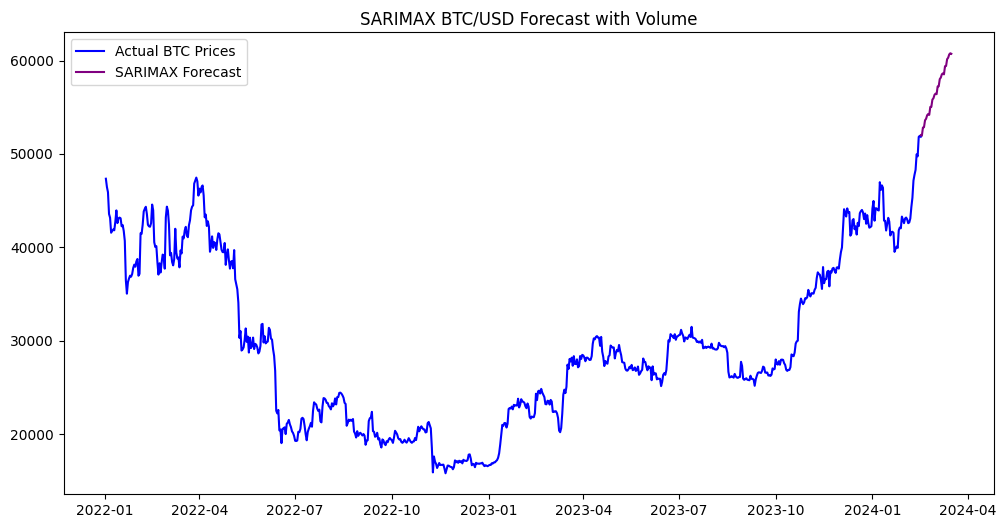

In [0]:
# SARIMAX with external variable (trading volume)
model_sarimax = SARIMAX(df["Close"], exog=df["Volume"], order=(1,1,1), seasonal_order=(1,1,1,7))
sarimax_fit = model_sarimax.fit()

# Forecast 30 days ahead (use last known volume values)
forecast_sarimax = sarimax_fit.forecast(steps=30, exog=df["Volume"].iloc[-30:])

# Plot Forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Actual BTC Prices", color="blue")
plt.plot(pd.date_range(df.index[-1], periods=30, freq="D"), forecast_sarimax, label="SARIMAX Forecast", color="purple")
plt.legend()
plt.title("SARIMAX BTC/USD Forecast with Volume")
plt.show()


## 3.4. Cross-Validation for Time Series
Unlike traditional cross-validation, time series cross-validation ensures the model is trained on past data and tested on future values.
Rolling-window validation ensures robustness across different periods.


Traditional k-fold cross-validation randomly splits data, which is wrong for time series because it disrupts temporal dependencies.

Instead, we use TimeSeriesSplit (expanding window or rolling window) to evaluate model performance on unseen future data while maintaining chronological order.

include three evaluation metrics:

MAPE (Mean Absolute Percentage Error) → Measures relative error (percentage).

MAE (Mean Absolute Error) → Measures absolute error in original units.

RMSE (Root Mean Squared Error) → Penalizes larger errors more heavily.

/databricks/python/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/databricks/python/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/databricks/python/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/databricks/python/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/databricks/python/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/databricks/python/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_m

Average MAE: 5420.39
Average MSE: 57357360.26
Average MAPE: 18.91%


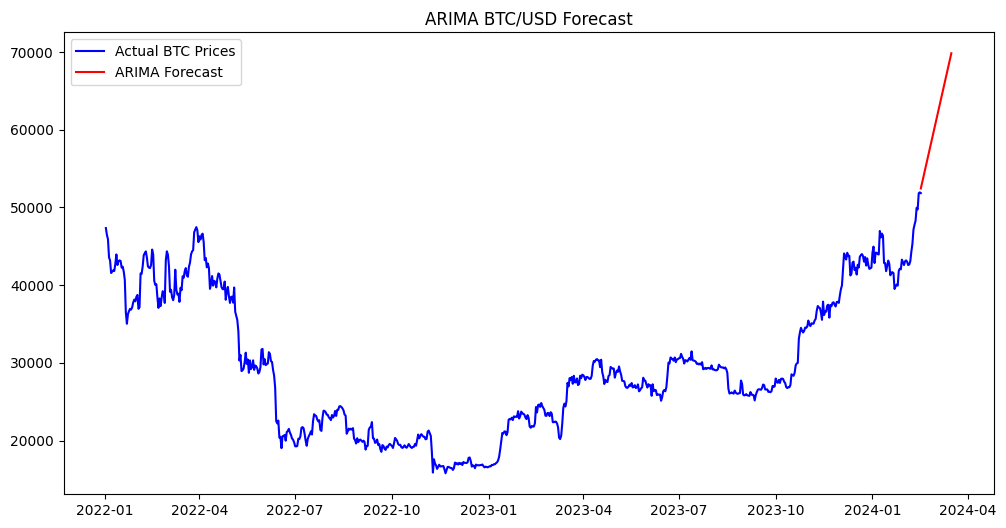

In [0]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Number of splits for cross-validation
n_splits = 5  

# Initialize time series cross-validation method
tscv = TimeSeriesSplit(n_splits=n_splits)

# Store error metrics for evaluation
mae_scores = []
mse_scores = []
mape_scores = []

# Loop through each train-test split
for train_index, test_index in tscv.split(df):
    train, test = df.iloc[train_index], df.iloc[test_index]
    
    # Train an ARIMA model (you can replace with SARIMA, Prophet, etc.)
    model = ARIMA(train['Close'], order=(2,1,2))  # Adjust (p,d,q) as needed
    model_fit = model.fit()
    
    # Make predictions
    predictions = model_fit.forecast(steps=len(test))
    
    # Compute error metrics
    mae = mean_absolute_error(test['Close'], predictions)
    mse = mean_squared_error(test['Close'], predictions)
    mape = mean_absolute_percentage_error(test['Close'], predictions)

    # Store results
    mae_scores.append(mae)
    mse_scores.append(mse)
    mape_scores.append(mape)

# Print evaluation results
print(f"Average MAE: {np.mean(mae_scores):.2f}")
print(f"Average MSE: {np.mean(mse_scores):.2f}")
print(f"Average MAPE: {np.mean(mape_scores):.2f}%")


# Plot Forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Actual BTC Prices", color="blue")
plt.plot(pd.date_range(df.index[-1], periods=30, freq="D"), forecast_arima, label="ARIMA Forecast", color="red")
plt.legend()
plt.title("ARIMA BTC/USD Forecast")
plt.show()



/databricks/python/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/databricks/python/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/databricks/python/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/databricks/python/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/databricks/python/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/databricks/python/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum L

Average MAE: 4832.23
Average MSE: 45884529.32
Average MAPE: 15.77%


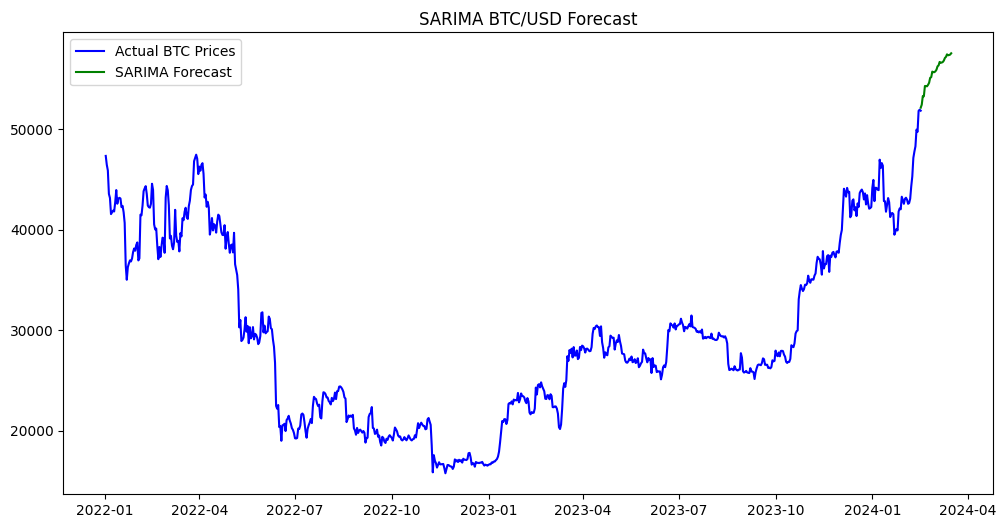

In [0]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Number of splits for cross-validation
n_splits = 5  

# Initialize time series cross-validation method
tscv = TimeSeriesSplit(n_splits=n_splits)

# Store error metrics for evaluation
mae_scores = []
mse_scores = []
mape_scores = []

# Loop through each train-test split
for train_index, test_index in tscv.split(df):
    train, test = df.iloc[train_index], df.iloc[test_index]
    
    # Train a SARIMA model (seasonal ARIMA) (you can adjust (p,d,q) and (P,D,Q,S) as needed)
    model = SARIMAX(train['Close'], order=(2,1,2), seasonal_order=(1,1,1,12))  # Adjust orders as needed
    model_fit = model.fit(disp=False)
    
    # Make predictions
    predictions = model_fit.forecast(steps=len(test))
    
    # Compute error metrics
    mae = mean_absolute_error(test['Close'], predictions)
    mse = mean_squared_error(test['Close'], predictions)
    mape = mean_absolute_percentage_error(test['Close'], predictions)

    # Store results
    mae_scores.append(mae)
    mse_scores.append(mse)
    mape_scores.append(mape)

# Print evaluation results
print(f"Average MAE: {np.mean(mae_scores):.2f}")
print(f"Average MSE: {np.mean(mse_scores):.2f}")
print(f"Average MAPE: {np.mean(mape_scores):.2f}%")


# Plot Forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Actual BTC Prices", color="blue")
plt.plot(pd.date_range(df.index[-1], periods=30, freq="D"), forecast_sarima, label="SARIMA Forecast", color="green")
plt.legend()
plt.title("SARIMA BTC/USD Forecast")
plt.show()



/databricks/python/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/databricks/python/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/databricks/python/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/databricks/python/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/databricks/python/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/databricks/python/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum L

Average MAE: 9442.54
Average MSE: 173854682.26
Average MAPE: 36.86%


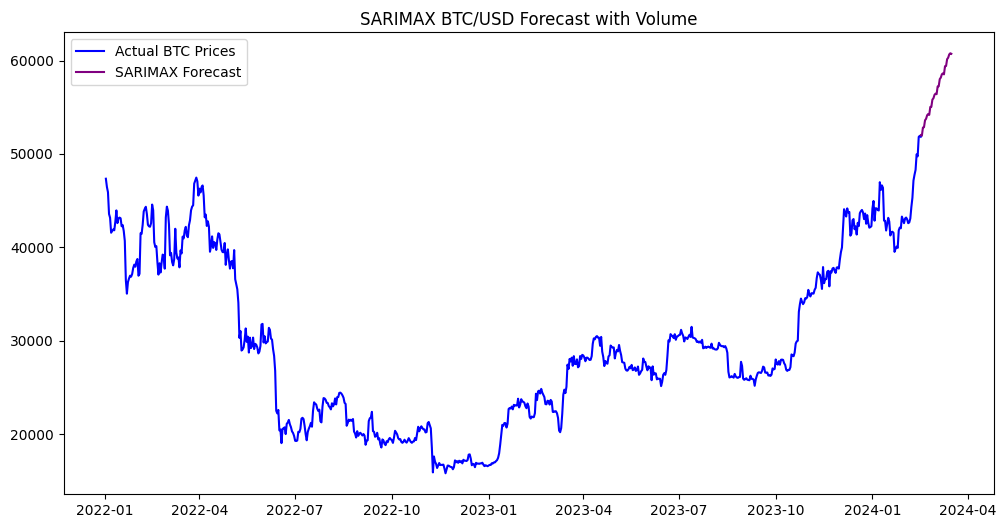

In [0]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Number of splits for cross-validation
n_splits = 5  

# Initialize time series cross-validation method
tscv = TimeSeriesSplit(n_splits=n_splits)

# Store error metrics for evaluation
mae_scores = []
mse_scores = []
mape_scores = []

# Loop through each train-test split
for train_index, test_index in tscv.split(df):
    train, test = df.iloc[train_index], df.iloc[test_index]
    
    # Define your exogenous variables (if available)
    # Assume 'Exogenous' is a column with your exogenous predictors
    exog_train = train[['Volume']]  
    exog_test = test[['Volume']]   
    
    # Train a SARIMAX model (seasonal ARIMA with exogenous variables)
    model = SARIMAX(train['Close'], order=(2,1,2), seasonal_order=(1,1,1,12), exog=exog_train)
    model_fit = model.fit(disp=False)
    
    # Make predictions
    predictions = model_fit.forecast(steps=len(test), exog=exog_test)
    
    # Compute error metrics
    mae = mean_absolute_error(test['Close'], predictions)
    mse = mean_squared_error(test['Close'], predictions)
    mape = mean_absolute_percentage_error(test['Close'], predictions)

    # Store results
    mae_scores.append(mae)
    mse_scores.append(mse)
    mape_scores.append(mape)

# Print evaluation results
print(f"Average MAE: {np.mean(mae_scores):.2f}")
print(f"Average MSE: {np.mean(mse_scores):.2f}")
print(f"Average MAPE: {np.mean(mape_scores):.2f}%")


# Plot Forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Actual BTC Prices", color="blue")
plt.plot(pd.date_range(df.index[-1], periods=30, freq="D"), forecast_sarimax, label="SARIMAX Forecast", color="purple")
plt.legend()
plt.title("SARIMAX BTC/USD Forecast with Volume")
plt.show()


## 4. Machine Learning-Based Forecasting
This section explores advanced machine learning approaches for BTC price forecasting.

### 4.1. Facebook Prophet
An automated time series forecasting model developed by Facebook.
Handles seasonality, trends, and holidays effectively with minimal parameter tuning.

In [0]:
pip install prophet

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpz2g5r_jb/2tyuge8p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz2g5r_jb/q8u9kk4d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/local_disk0/.ephemeral_nfs/envs/pythonEnv-66d18356-f9f7-4cd2-bf71-ddfa69486083/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45216', 'data', 'file=/tmp/tmpz2g5r_jb/2tyuge8p.json', 'init=/tmp/tmpz2g5r_jb/q8u9kk4d.json', 'output', 'file=/tmp/tmpz2g5r_jb/prophet_modelo1xap6sc/prophet_model-20250314144039.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:40:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:40:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 3 forecasts with cutoffs between 2023-01-22 00:00:00 and 2024-01-17 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpz2g5r_jb/fo4w1vzd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz2g5r_jb/i5kzkuet.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/local_disk0/.ephemeral_nfs/envs/pythonEnv-66d18356-f9f7-4cd2-bf71-ddfa69486083/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31982', 'data', 'file=/tmp/tmpz2g5r_jb/fo4w1vzd.json', 'init=/tmp/tmpz2g5r_jb/i5kzkuet.json', 'output', 'file=/tmp/tmpz2g5r_jb/prophet_model16r88yam/prophet_model-20250314144039.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:40:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:40:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz2g5r_jb/u36a5afx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz2g5r_jb/t64fc6mv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running C

   horizon           mse         rmse  ...     mdape     smape  coverage
0   3 days  2.297611e+07  4793.339734  ...  0.130998  0.165683       0.0
1   4 days  2.512304e+07  5012.288556  ...  0.133752  0.175001       0.0
2   5 days  3.163906e+07  5624.861251  ...  0.148790  0.193678       0.0
3   6 days  3.658022e+07  6048.158301  ...  0.195861  0.205199       0.0
4   7 days  4.165932e+07  6454.403457  ...  0.195861  0.216717       0.0
5   8 days  4.233612e+07  6506.621312  ...  0.195861  0.217541       0.0
6   9 days  4.085271e+07  6391.612644  ...  0.194213  0.214933       0.0
7  10 days  3.945657e+07  6281.446325  ...  0.201224  0.212473       0.0
8  11 days  3.887288e+07  6234.812063  ...  0.206928  0.212226       0.0
9  12 days  4.007006e+07  6330.091527  ...  0.208490  0.214479       0.0
10 13 days  4.105920e+07  6407.745144  ...  0.239537  0.214013       0.0
11 14 days  4.270794e+07  6535.131231  ...  0.239537  0.213362       0.0
12 15 days  4.434570e+07  6659.256381  ...  0.22026

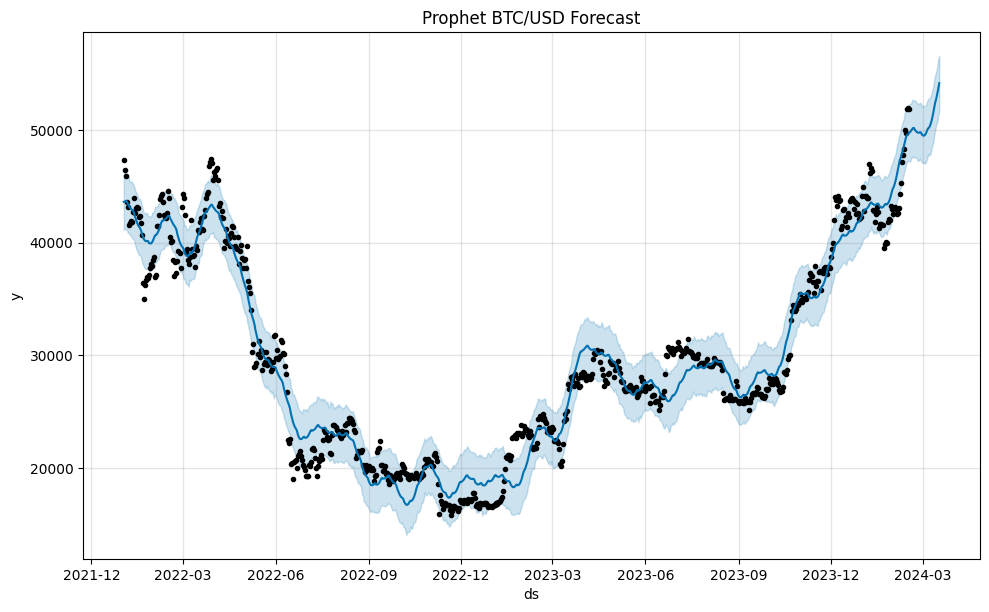

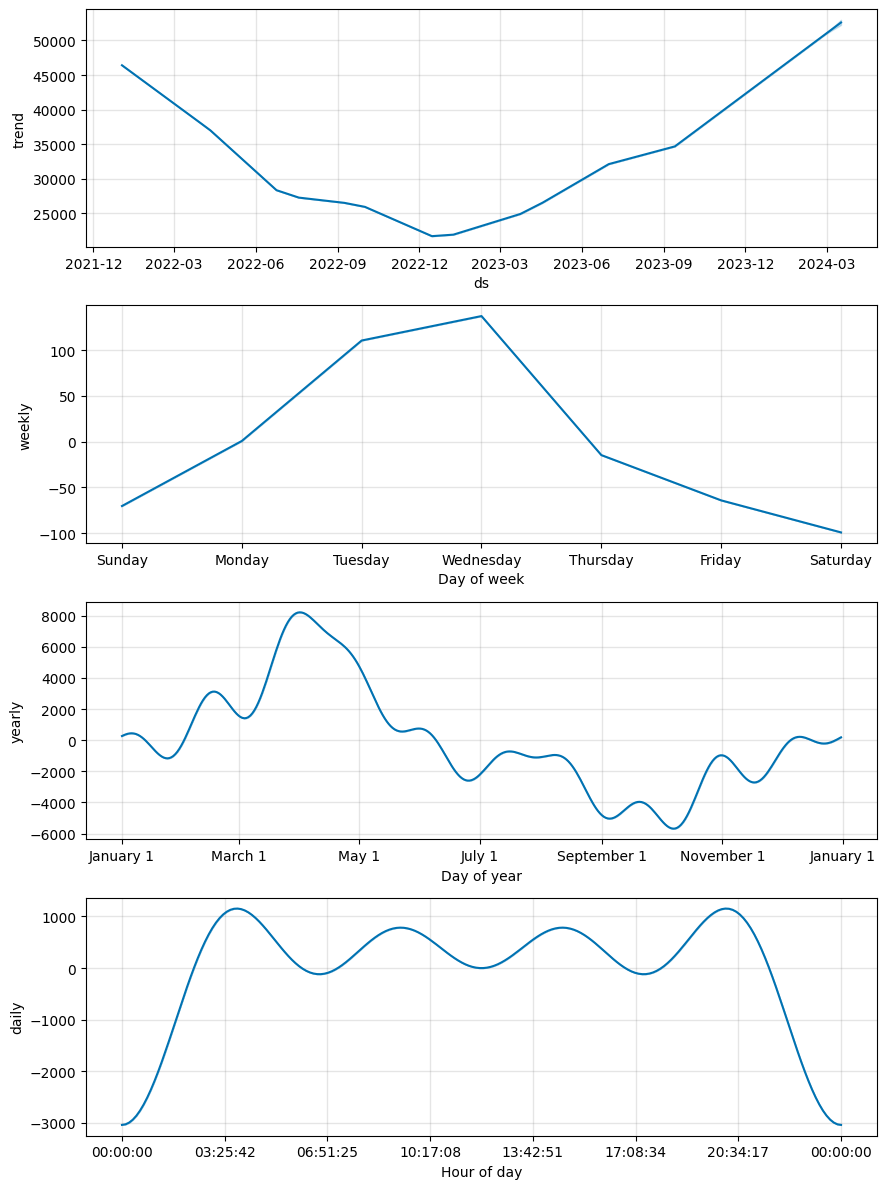

In [0]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prepare Data
df_prophet = df[["Date", "Close"]].rename(columns={"Date": "ds", "Close": "y"})

# Initialize the Prophet model
prophet_model = Prophet(daily_seasonality=True, yearly_seasonality=True)

# Fit the model before cross-validation
prophet_model.fit(df_prophet)

# Number of splits for cross-validation
n_splits = 5  

# Cross-validation using Prophet's cross_validation method
df_cv = cross_validation(prophet_model, initial='365 days', period='180 days', horizon='30 days')

# Evaluate performance
df_p = performance_metrics(df_cv)

# Print performance metrics for each fold
print(df_p)

# Compute specific metrics like MAE, RMSE, and MAPE for the cross-validation result
mae = mean_absolute_error(df_cv['y'], df_cv['yhat'])
rmse = np.sqrt(mean_squared_error(df_cv['y'], df_cv['yhat']))
mape = np.mean(np.abs((df_cv['y'] - df_cv['yhat']) / df_cv['y'])) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")

# Create Future Dataframe (Next 30 days)
future = prophet_model.make_future_dataframe(periods=30)
forecast = prophet_model.predict(future)

# Plot Forecast
prophet_model.plot(forecast)
plt.title("Prophet BTC/USD Forecast")
plt.show()

# Plot Components
prophet_model.plot_components(forecast)
plt.show()


### 4.2. Prophet with Exogenous Variables
Prophet is extended to include external factors (e.g., trading volume) for improved accuracy.
Useful when market behavior depends on multiple interacting variables.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz2g5r_jb/tzspx55t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz2g5r_jb/yzzyt947.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/local_disk0/.ephemeral_nfs/envs/pythonEnv-66d18356-f9f7-4cd2-bf71-ddfa69486083/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89591', 'data', 'file=/tmp/tmpz2g5r_jb/tzspx55t.json', 'init=/tmp/tmpz2g5r_jb/yzzyt947.json', 'output', 'file=/tmp/tmpz2g5r_jb/prophet_modelh6tc0mlk/prophet_model-20250314144041.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:40:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:40:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 3 forecasts with cutoffs between 2023-01-22 00:00:00 

  0%|          | 0/3 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpz2g5r_jb/apdjjida.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz2g5r_jb/_w_ll1o2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/local_disk0/.ephemeral_nfs/envs/pythonEnv-66d18356-f9f7-4cd2-bf71-ddfa69486083/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83706', 'data', 'file=/tmp/tmpz2g5r_jb/apdjjida.json', 'init=/tmp/tmpz2g5r_jb/_w_ll1o2.json', 'output', 'file=/tmp/tmpz2g5r_jb/prophet_modelma8ep00k/prophet_model-20250314144041.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:40:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:40:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz2g5r_jb/wi1mgpya.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz2g5r_jb/zba85xs3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running C

   horizon           mse         rmse  ...     mdape     smape  coverage
0   3 days  1.295435e+07  3599.215855  ...  0.062297  0.128222  0.444444
1   4 days  1.389698e+07  3727.864875  ...  0.090949  0.134348  0.444444
2   5 days  1.772221e+07  4209.775707  ...  0.104841  0.151787  0.222222
3   6 days  2.027023e+07  4502.246775  ...  0.111917  0.162610  0.111111
4   7 days  2.320779e+07  4817.446642  ...  0.114707  0.174090  0.000000
5   8 days  2.256419e+07  4750.178356  ...  0.114707  0.172568  0.000000
6   9 days  2.172387e+07  4660.886762  ...  0.128779  0.169358  0.000000
7  10 days  2.112348e+07  4596.028277  ...  0.151822  0.166402  0.111111
8  11 days  2.214992e+07  4706.370232  ...  0.164323  0.168987  0.111111
9  12 days  2.386504e+07  4885.185530  ...  0.171280  0.172923  0.222222
10 13 days  2.481524e+07  4981.489969  ...  0.203330  0.175176  0.111111
11 14 days  2.569776e+07  5069.295455  ...  0.204678  0.176025  0.111111
12 15 days  2.613678e+07  5112.414155  ...  0.21126

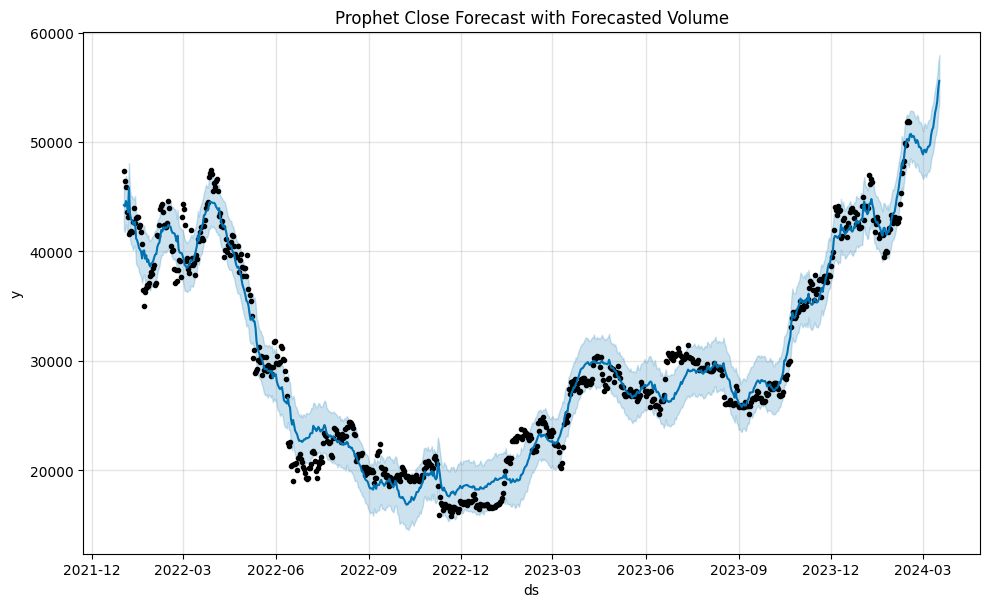

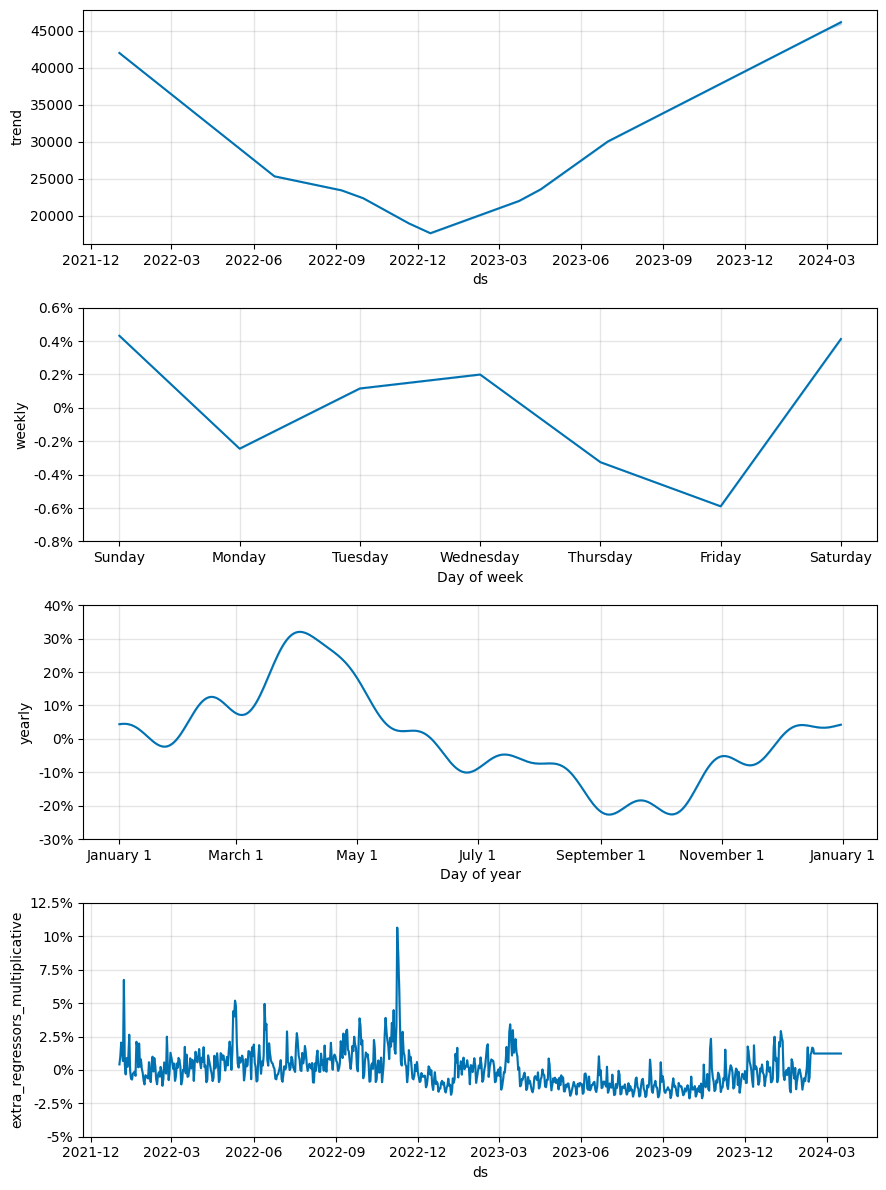

In [0]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil.relativedelta

# Forward fill missing values in 'Volume'
df['Volume'] = df['Volume'].fillna(method='ffill')

# Prepare Data
df_prophet = df[["Date", "Close", "Volume"]].rename(columns={"Date": "ds", "Close": "y"})  

# Define end_date and start_date
end_date = datetime.now()
start_date = df["Date"].min()

# Create the monthly_flag DataFrame for monthly seasonality
monthly_flag = pd.DataFrame()
current_dt = pd.to_datetime(start_date)

last_date_in_data = df["Date"].max()
end_of_forecast = last_date_in_data.replace(day=1) + pd.DateOffset(months=4) - pd.DateOffset(days=1)


# Initialize the Prophet model 
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True, seasonality_mode='multiplicative')

# Add 'Volume' as a regressor
prophet_model.add_regressor('Volume')

# Fit the model with the 'Volume' regressor
prophet_model.fit(df_prophet)

# Number of splits for cross-validation
n_splits = 5  

# Cross-validation using Prophet's cross_validation method
df_cv = cross_validation(prophet_model, initial='365 days', period='180 days', horizon='30 days')

# Evaluate performance
df_p = performance_metrics(df_cv)

# Print performance metrics for each fold
print(df_p)

# Compute specific metrics like MAE, RMSE, and MAPE for the cross-validation result
mae = mean_absolute_error(df_cv['y'], df_cv['yhat'])
rmse = np.sqrt(mean_squared_error(df_cv['y'], df_cv['yhat']))
mape = np.mean(np.abs((df_cv['y'] - df_cv['yhat']) / df_cv['y'])) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")

# Create Future Dataframe (Next 30 days)
future = prophet_model.make_future_dataframe(periods=30, freq='D')

# Ensure you merge with the 'ds' column from the original dataframe df
future = future.merge(df[['Date', 'Volume']].rename(columns={'Date': 'ds'}), on='ds', how='left').fillna(method='ffill')

forecast = prophet_model.predict(future)

# Plot Forecast
prophet_model.plot(forecast)
plt.title("Prophet Close Forecast with Forecasted Volume")
plt.show()

# Plot Components
prophet_model.plot_components(forecast)
plt.show()




### 4.3. Prophet with manually defined monthly seasonality


DEBUG:cmdstanpy:input tempfile: /tmp/tmpz2g5r_jb/g40golol.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz2g5r_jb/xrg2h12_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/local_disk0/.ephemeral_nfs/envs/pythonEnv-66d18356-f9f7-4cd2-bf71-ddfa69486083/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53232', 'data', 'file=/tmp/tmpz2g5r_jb/g40golol.json', 'init=/tmp/tmpz2g5r_jb/xrg2h12_.json', 'output', 'file=/tmp/tmpz2g5r_jb/prophet_modelidldgts2/prophet_model-20250314144043.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:40:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:40:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 3 forecasts with cutoffs between 2023-01-22 00:00:00 and 2024-01-17 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpz2g5r_jb/mq4abv9x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz2g5r_jb/2ha1dwwj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/local_disk0/.ephemeral_nfs/envs/pythonEnv-66d18356-f9f7-4cd2-bf71-ddfa69486083/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9792', 'data', 'file=/tmp/tmpz2g5r_jb/mq4abv9x.json', 'init=/tmp/tmpz2g5r_jb/2ha1dwwj.json', 'output', 'file=/tmp/tmpz2g5r_jb/prophet_modelxl7di6m9/prophet_model-20250314144044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:40:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:40:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz2g5r_jb/ln0o06pf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz2g5r_jb/l0em_kt8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running Cm

   horizon           mse         rmse  ...     mdape     smape  coverage
0   3 days  1.948553e+07  4414.242133  ...  0.134436  0.140660       0.0
1   4 days  2.018817e+07  4493.125281  ...  0.135945  0.143789       0.0
2   5 days  2.472281e+07  4972.203620  ...  0.145380  0.154670       0.0
3   6 days  2.868947e+07  5356.255341  ...  0.163523  0.159717       0.0
4   7 days  3.229376e+07  5682.759884  ...  0.164399  0.163155       0.0
5   8 days  3.336757e+07  5776.466843  ...  0.171633  0.158391       0.0
6   9 days  3.099690e+07  5567.486393  ...  0.171633  0.149855       0.0
7  10 days  2.872622e+07  5359.685039  ...  0.152723  0.141806       0.0
8  11 days  2.713725e+07  5209.342800  ...  0.152723  0.144669       0.0
9  12 days  3.074370e+07  5544.700509  ...  0.152692  0.156110       0.0
10 13 days  3.480129e+07  5899.262122  ...  0.163636  0.161509       0.0
11 14 days  3.978819e+07  6307.788118  ...  0.163636  0.166118       0.0
12 15 days  4.346164e+07  6592.544399  ...  0.17400

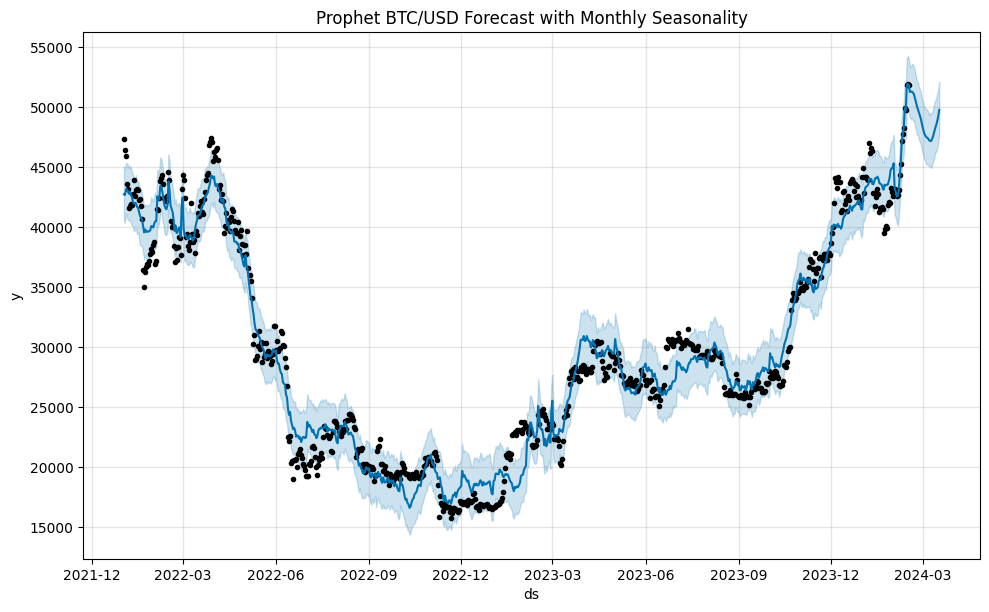

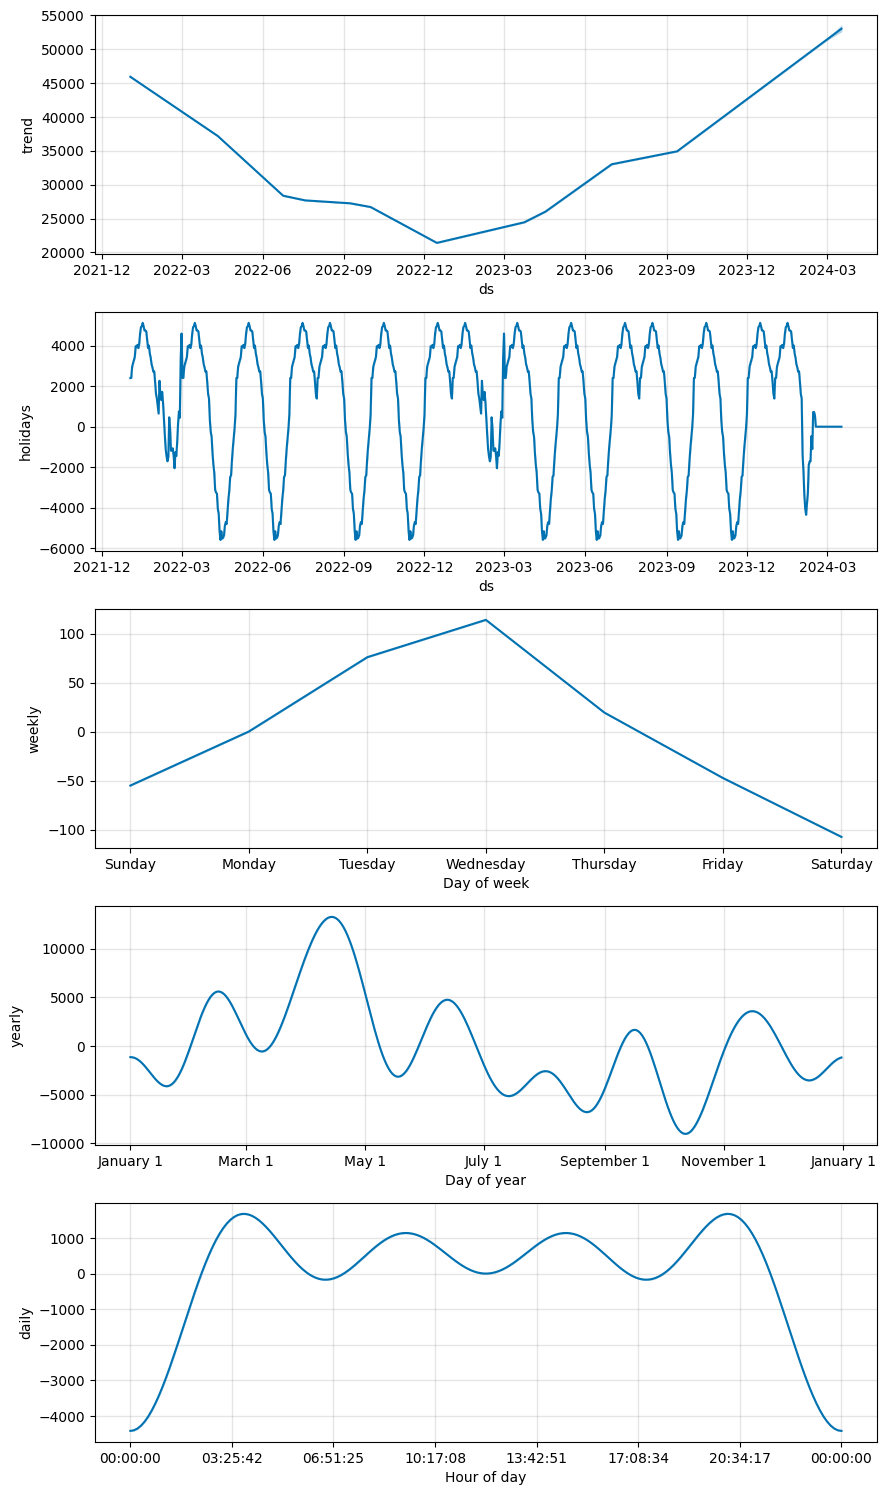

In [0]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil.relativedelta

# Prepare Data
df_prophet = df[["Date", "Close"]].rename(columns={"Date": "ds", "Close": "y"})

# Create the monthly_flag DataFrame for monthly seasonality
monthly_flag = pd.DataFrame()
start_date = df["Date"].min()
current_dt = pd.to_datetime(start_date)
end_date = df["Date"].max()

# Add the monthly flag holidays
while current_dt <= pd.to_datetime(end_date):
    month = current_dt.month

    if month in ([1, 3, 5, 7, 8, 10, 12]):
        monthly_flag = pd.concat([monthly_flag, pd.DataFrame({'holiday': 'monthly_31_days', 'ds': current_dt, 'lower_window': 0, 'upper_window': 30}, index=[0])], ignore_index=True)
    elif month in ([4, 6, 9, 11]):
        monthly_flag = pd.concat([monthly_flag, pd.DataFrame({'holiday': 'monthly_30_days', 'ds': current_dt, 'lower_window': 0, 'upper_window': 29}, index=[0])], ignore_index=True)
    elif (current_dt.is_leap_year == True) & (current_dt.month == 2):
        monthly_flag = pd.concat([monthly_flag, pd.DataFrame({'holiday': 'monthly_29_days', 'ds': current_dt, 'lower_window': 0, 'upper_window': 28}, index=[0])], ignore_index=True)
    else:
        monthly_flag = pd.concat([monthly_flag, pd.DataFrame({'holiday': 'monthly_28_days', 'ds': current_dt, 'lower_window': 0, 'upper_window': 27}, index=[0])], ignore_index=True)

    current_dt = current_dt + dateutil.relativedelta.relativedelta(months=1)

# Initialize the Prophet model with monthly seasonality
prophet_model = Prophet(daily_seasonality=True, yearly_seasonality=True, holidays=monthly_flag)

# Fit the model before cross-validation
prophet_model.fit(df_prophet)

# Number of splits for cross-validation
n_splits = 5

# Cross-validation using Prophet's cross_validation method
df_cv = cross_validation(prophet_model, initial='365 days', period='180 days', horizon='30 days')

# Evaluate performance
df_p = performance_metrics(df_cv)

# Print performance metrics for each fold
print(df_p)

# Compute specific metrics like MAE, RMSE, and MAPE for the cross-validation result
mae = mean_absolute_error(df_cv['y'], df_cv['yhat'])
rmse = np.sqrt(mean_squared_error(df_cv['y'], df_cv['yhat']))
mape = np.mean(np.abs((df_cv['y'] - df_cv['yhat']) / df_cv['y'])) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")

# Create Future Dataframe (Next 30 days)
future = prophet_model.make_future_dataframe(periods=30)
forecast = prophet_model.predict(future)

# Plot Forecast
prophet_model.plot(forecast)
plt.title("Prophet BTC/USD Forecast with Monthly Seasonality")
plt.show()

# Plot Components
prophet_model.plot_components(forecast)
plt.show()


LSTM (Deep Learning Approach)

Handles non-linear dependencies

Learns from long historical trends

Can be combined with external features (trading volume, sentiment)

In [0]:
%pip install tensorflow


Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
!pip install optree

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
pip install lightgbm

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
pip install xgboost

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


XGBoost Regressor (Tree-Based)

In [0]:
pip install lightgbm

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


## 5. Monte Carlo Simulation for BTC Price Prediction
Monte Carlo simulations are used to estimate future BTC prices based on probabilistic models.



### 5.1. Geometric Brownian Motion (GBM) Simulation
Simulates BTC price paths using stochastic differential equations.
Incorporates random variations to model price uncertainty. 

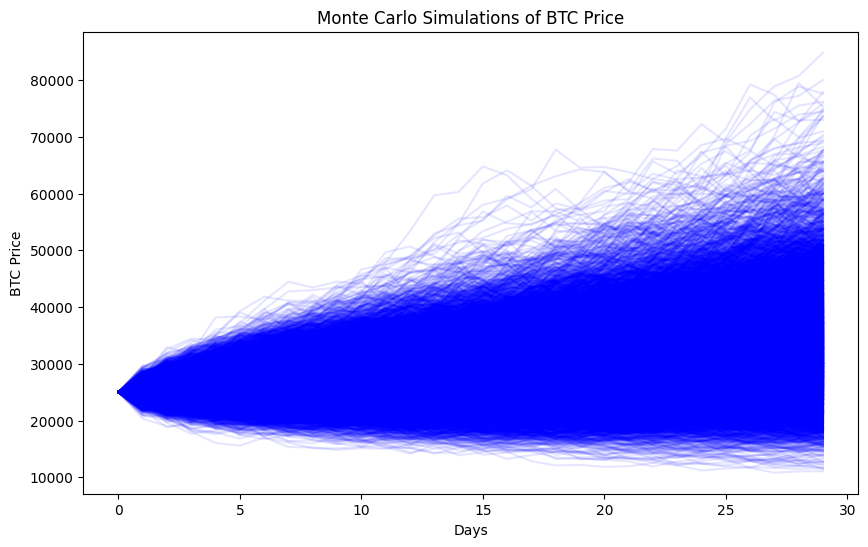

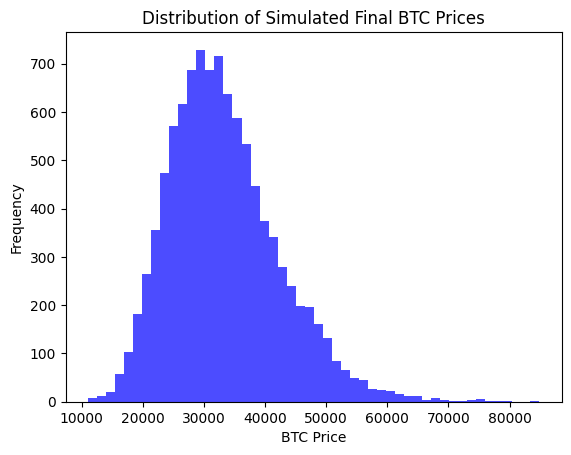

Mean final price: 33336.95608318668
Standard deviation of final price: 9022.014333888741


In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters (use real historical data to estimate these values)
S0 = 25000  # Current BTC price
mu = 0.01  # Drift (average return)
sigma = 0.05  # Volatility
T = 30  # Forecast period (30 days)
dt = 1  # Daily steps
N = 10000  # Number of simulations

# Simulating Monte Carlo paths
simulations = np.zeros((N, T))
for i in range(N):
    path = [S0]
    for t in range(1, T):
        # Geometric Brownian motion
        dW = np.random.normal(0, np.sqrt(dt))  # Wiener process
        dS = mu * path[-1] * dt + sigma * path[-1] * dW  # GBM formula
        path.append(path[-1] + dS)
    simulations[i] = path

# Plot the simulations
plt.figure(figsize=(10, 6))
plt.plot(simulations.T, color='blue', alpha=0.1)  # Plot all paths with transparency
plt.title('Monte Carlo Simulations of BTC Price')
plt.xlabel('Days')
plt.ylabel('BTC Price')
plt.show()

# Visualize the distribution of final prices
final_prices = simulations[:, -1]
plt.hist(final_prices, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Simulated Final BTC Prices')
plt.xlabel('BTC Price')
plt.ylabel('Frequency')
plt.show()

# Calculate and display summary statistics
mean_price = np.mean(final_prices)
std_price = np.std(final_prices)
print(f"Mean final price: {mean_price}")
print(f"Standard deviation of final price: {std_price}")


### 5.2. Monte Carlo Forecasting
Runs thousands of simulated price paths based on estimated drift and volatility.
Helps assess risk and potential price ranges with confidence intervals.

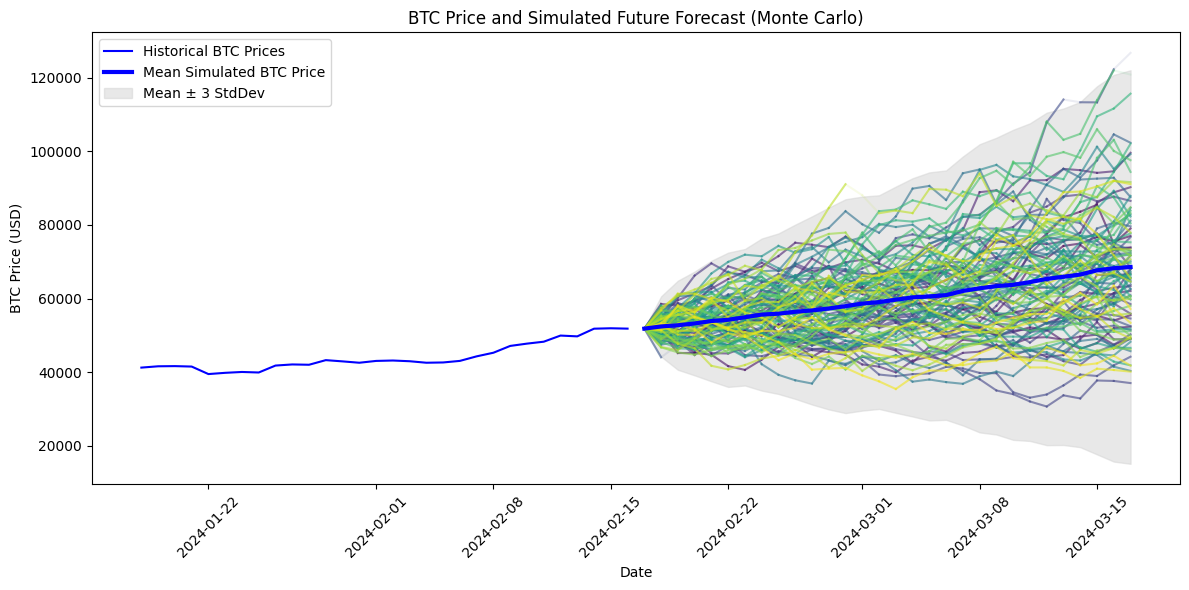

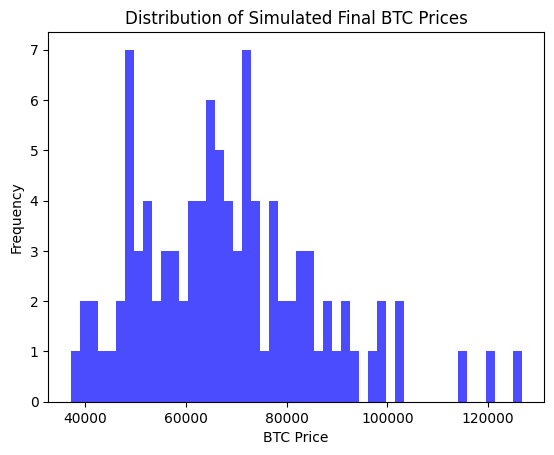

Mean final price: 68563.02991474292
Standard deviation of final price: 17803.843070548304


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Assuming df is your historical BTC DataFrame with 'Date' and 'Close' columns
# Example: df = pd.read_csv('btc_data.csv')  # Make sure 'Date' is datetime and 'Close' contains BTC price

# Get the last 30 days of historical data
historical_data = df['Close'].tail(30)

# Parameters for Monte Carlo simulation
S0 = historical_data.iloc[-1]  # Last historical BTC price
mu = 0.01  # Drift (average return)
sigma = 0.05  # Volatility
T = 30  # Forecast period (30 days)
dt = 1  # Daily steps
N = 100 # Number of simulations

# Simulating Monte Carlo paths
simulations = np.zeros((N, T))
for i in range(N):
    path = [S0]
    for t in range(1, T):
        dW = np.random.normal(0, np.sqrt(dt))  # Wiener process
        dS = mu * path[-1] * dt + sigma * path[-1] * dW  # GBM formula
        path.append(path[-1] + dS)
    simulations[i] = path

# Create the time index for the simulation
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=T, freq='D')

# Calculate the mean and standard deviation of the simulations
mean_simulated_prices = simulations.mean(axis=0)
std_simulated_prices = simulations.std(axis=0)

# Calculate the bounds for mean ± 3 standard deviations
upper_bound = mean_simulated_prices + 3 * std_simulated_prices
lower_bound = mean_simulated_prices - 3 * std_simulated_prices

# Create the time index for the historical data
historical_dates = df.index[-30:]

# Plot historical BTC data (last 30 days)
plt.figure(figsize=(12, 6))
plt.plot(historical_dates, historical_data, color='blue', label='Historical BTC Prices')

# Plot all Monte Carlo simulations with varying brightness near the grey shaded area
for i in range(N):
    # Check if the simulation path is within the mean ± 3 std deviation range
    path = simulations[i, :]
    opacity = np.where((path >= lower_bound) & (path <= upper_bound), 0.6, 0.1)  # Brighter opacity within bounds
    for j in range(T - 1):
        plt.plot(future_dates[j:j+2], path[j:j+2], color=plt.cm.viridis(i / N), alpha=opacity[j])

# Plot the mean of the simulations (bold orange line)
plt.plot(future_dates, mean_simulated_prices, color='blue', linewidth=3, label='Mean Simulated BTC Price')

# Add shaded region for mean ± 3 std deviation
plt.fill_between(future_dates, lower_bound, upper_bound, color='lightgrey', alpha=0.5, label='Mean ± 3 StdDev')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('BTC Price (USD)')
plt.title('BTC Price and Simulated Future Forecast (Monte Carlo)')

# Format x-axis dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Tight layout for a clean display
plt.tight_layout()

# Show the plot
plt.show()

# Visualize the distribution of final simulated prices
final_prices = simulations[:, -1]
plt.hist(final_prices, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Simulated Final BTC Prices')
plt.xlabel('BTC Price')
plt.ylabel('Frequency')
plt.show()

# Calculate and display summary statistics
mean_price = np.mean(final_prices)
std_price = np.std(final_prices)
print(f"Mean final price: {mean_price}")
print(f"Standard deviation of final price: {std_price}")


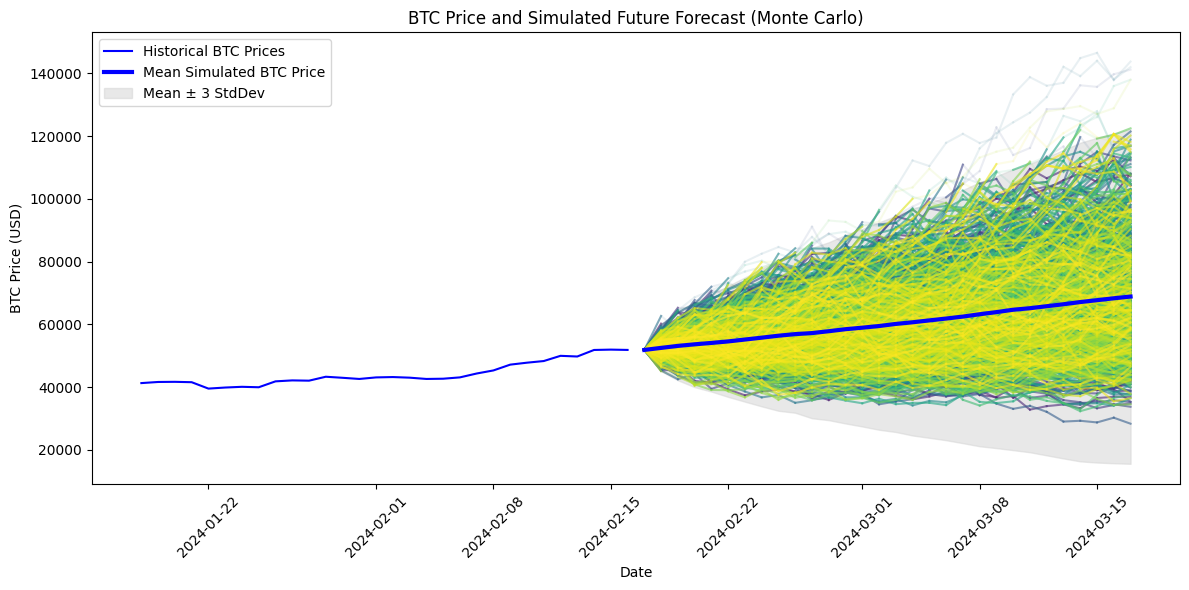

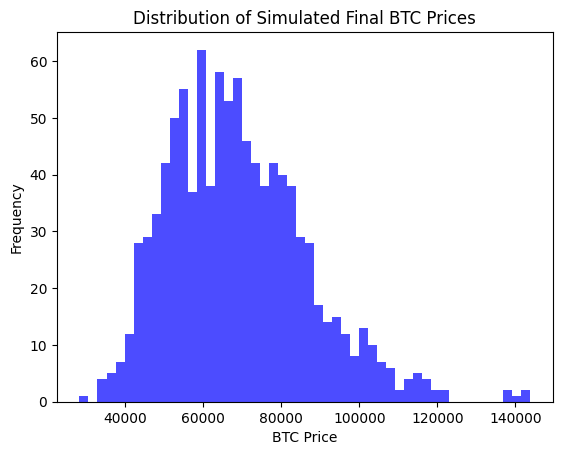

Mean final price: 68859.71431564409
Standard deviation of final price: 17778.613477317096


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

#  df = pd.read_csv('btc_data.csv')   

# Get the last 30 days of historical data
historical_data = df['Close'].tail(30)

# Parameters for Monte Carlo simulation
S0 = historical_data.iloc[-1]  # Last historical BTC price
mu = 0.01  # Drift (average return)
sigma = 0.05  # Volatility
T = 30  # Forecast period (30 days)
dt = 1  # Daily steps
N = 1000 # Number of simulations

# Simulating Monte Carlo paths
simulations = np.zeros((N, T))
for i in range(N):
    path = [S0]
    for t in range(1, T):
        dW = np.random.normal(0, np.sqrt(dt))  # Wiener process
        dS = mu * path[-1] * dt + sigma * path[-1] * dW  # GBM formula
        path.append(path[-1] + dS)
    simulations[i] = path

# Create the time index for the simulation
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=T, freq='D')

# Calculate the mean and standard deviation of the simulations
mean_simulated_prices = simulations.mean(axis=0)
std_simulated_prices = simulations.std(axis=0)

# Calculate the bounds for mean ± 3 standard deviations
upper_bound = mean_simulated_prices + 3 * std_simulated_prices
lower_bound = mean_simulated_prices - 3 * std_simulated_prices

# Create the time index for the historical data
historical_dates = df.index[-30:]

# Plot historical BTC data (last 30 days)
plt.figure(figsize=(12, 6))
plt.plot(historical_dates, historical_data, color='blue', label='Historical BTC Prices')

# Plot all Monte Carlo simulations with varying brightness near the grey shaded area
for i in range(N):
    # Check if the simulation path is within the mean ± 3 std deviation range
    path = simulations[i, :]
    opacity = np.where((path >= lower_bound) & (path <= upper_bound), 0.6, 0.1)  # Brighter opacity within bounds
    for j in range(T - 1):
        plt.plot(future_dates[j:j+2], path[j:j+2], color=plt.cm.viridis(i / N), alpha=opacity[j])

# Plot the mean of the simulations (bold orange line)
plt.plot(future_dates, mean_simulated_prices, color='blue', linewidth=3, label='Mean Simulated BTC Price')

# Add shaded region for mean ± 3 std deviation
plt.fill_between(future_dates, lower_bound, upper_bound, color='lightgrey', alpha=0.5, label='Mean ± 3 StdDev')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('BTC Price (USD)')
plt.title('BTC Price and Simulated Future Forecast (Monte Carlo)')

# Format x-axis dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Tight layout for a clean display
plt.tight_layout()

# Show the plot
plt.show()

# Visualize the distribution of final simulated prices
final_prices = simulations[:, -1]
plt.hist(final_prices, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Simulated Final BTC Prices')
plt.xlabel('BTC Price')
plt.ylabel('Frequency')
plt.show()

# Calculate and display summary statistics
mean_price = np.mean(final_prices)
std_price = np.std(final_prices)
print(f"Mean final price: {mean_price}")
print(f"Standard deviation of final price: {std_price}")


## 6. Deep Learning Methods for Time Series forecasting

### 6.1 LSTM 

Key Points:

Data Scaling: LSTM models generally perform better with normalized data, so we scale the "Close" values using MinMaxScaler from sklearn.

Create Dataset:
-  We use a function to create a dataset that converts the time series into a supervised format where each X is a sequence of time_step length and the corresponding y is the next value in the sequence.

-LSTM Model: 
The model consists of:
- An LSTM layer with 50 units (you can experiment with different values).
- A Dense layer to output the prediction.

Adam optimizer for training, and we use mean squared error loss.
-Metrics: After making predictions, we inverse-transform the scaled data back to the original scale and then compute MAE, MSE, and MAPE.

Hyperparameters to Experiment With:

- time_step: This is the number of previous time steps the model will look at to predict the next value. You can adjust this based on the data's temporal patterns.
- LSTM units: You can experiment with more or fewer units in the LSTM layer, depending on the complexity of the dataset.
- Epochs and batch size: Adjust based on the model's performance and training time.

### 6.2. LSTM Baseline Model 

2025-03-14 14:42:47.239209: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-14 14:42:47.251308: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-14 14:42:47.280692: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-14 14:42:47.291916: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741963367.315582   56504 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741963367.32

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


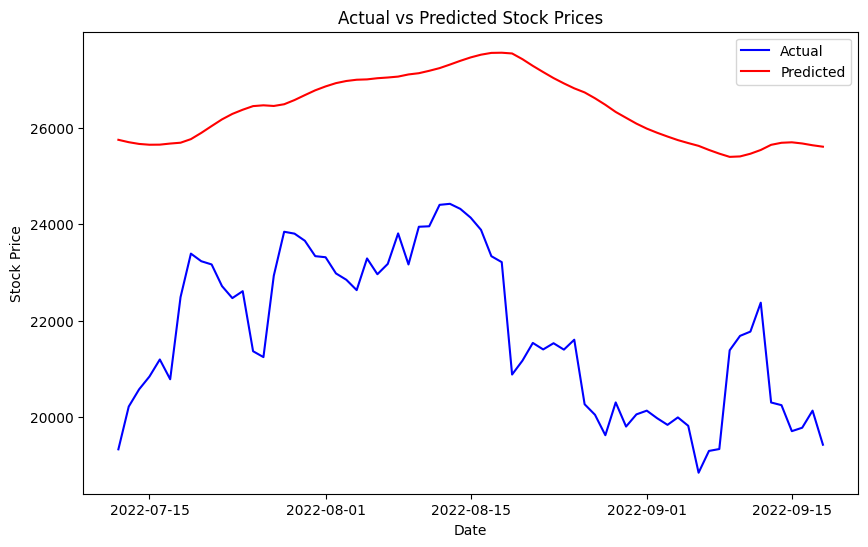

/local_disk0/.ephemeral_nfs/envs/pythonEnv-66d18356-f9f7-4cd2-bf71-ddfa69486083/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


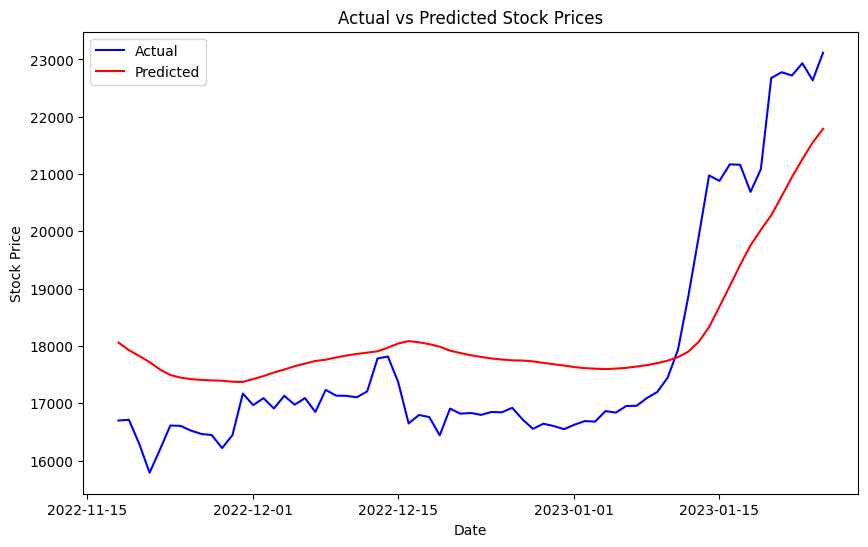

/local_disk0/.ephemeral_nfs/envs/pythonEnv-66d18356-f9f7-4cd2-bf71-ddfa69486083/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


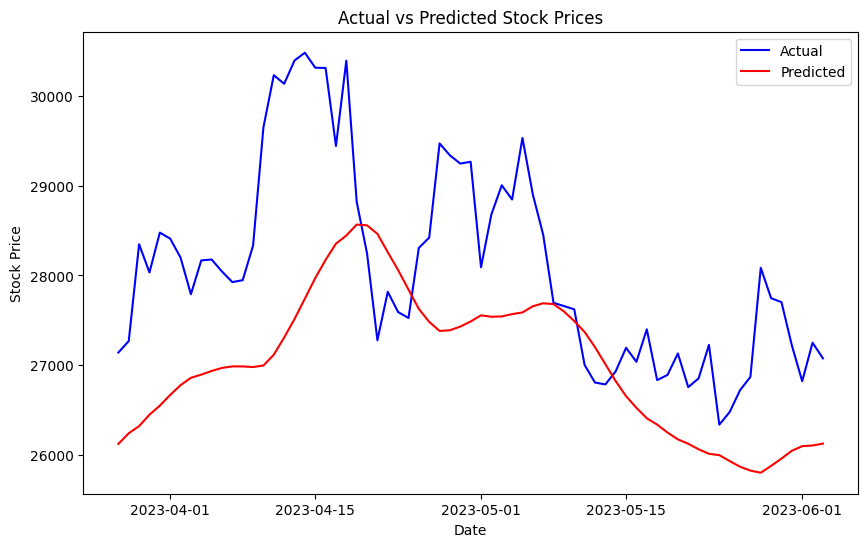

/local_disk0/.ephemeral_nfs/envs/pythonEnv-66d18356-f9f7-4cd2-bf71-ddfa69486083/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


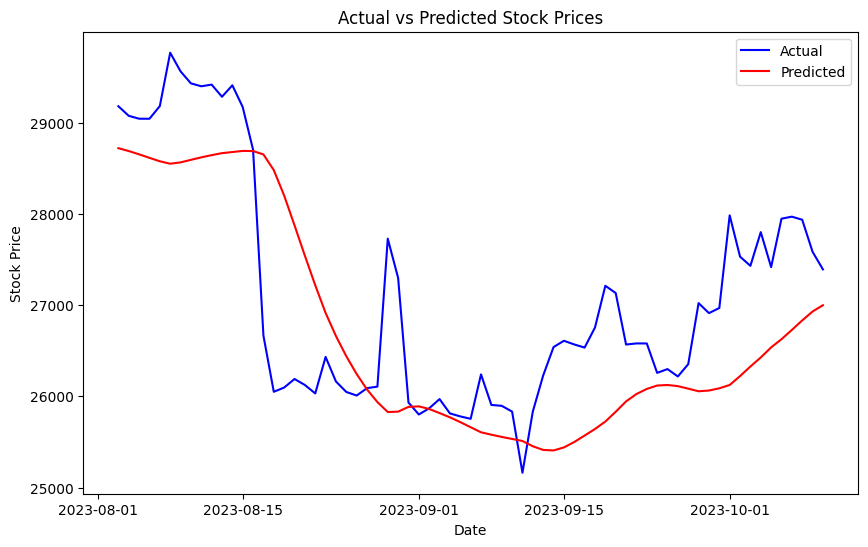

/local_disk0/.ephemeral_nfs/envs/pythonEnv-66d18356-f9f7-4cd2-bf71-ddfa69486083/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


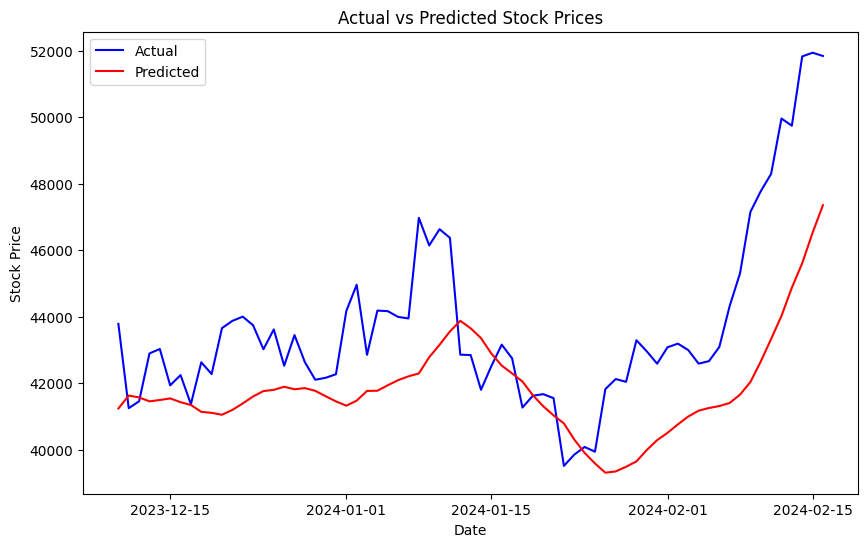

Average MAE: 1945.92
Average MSE: 6883564.10
Average MAPE: 7.85%


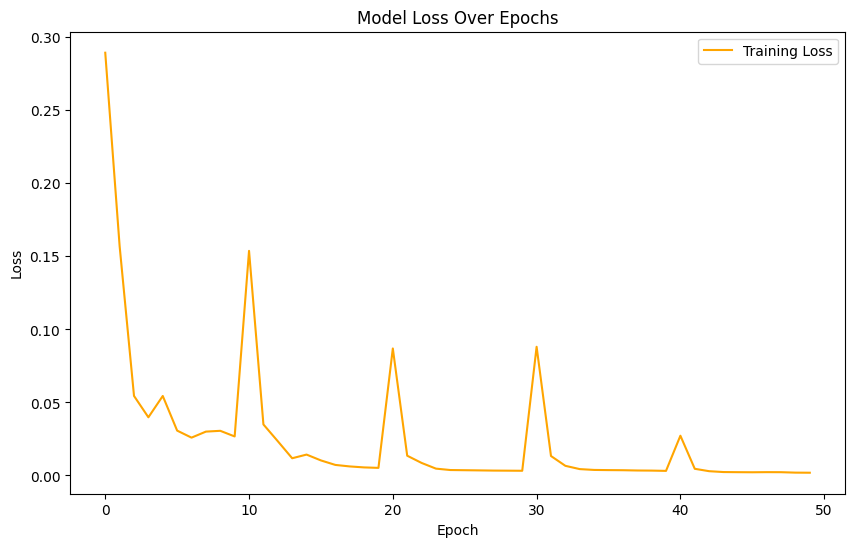

In [0]:
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Number of splits for cross-validation
n_splits = 5  

# Initialize time series cross-validation method
tscv = TimeSeriesSplit(n_splits=n_splits)

# Store error metrics for evaluation
mae_scores = []
mse_scores = []
mape_scores = []

# Normalize the data (LSTM requires scaled data)
scaler = MinMaxScaler(feature_range=(0, 1))

# Initialize list to store loss history for plotting convergence
loss_history = []

# Loop through each train-test split
for train_index, test_index in tscv.split(df):
    train, test = df.iloc[train_index], df.iloc[test_index]
    
    # Normalize the training and testing data
    train_scaled = scaler.fit_transform(train[['Close']])
    test_scaled = scaler.transform(test[['Close']])

    # Prepare data for LSTM
    def create_dataset(data, time_step=1):
        X, y = [], []
        for i in range(len(data) - time_step):
            X.append(data[i:(i + time_step), 0])
            y.append(data[i + time_step, 0])
        return np.array(X), np.array(y)

    time_step = 60  # 60 timesteps for the LSTM
    X_train, y_train = create_dataset(train_scaled, time_step)
    X_test, y_test = create_dataset(test_scaled, time_step)

    # Reshape input to be [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=False, input_shape=(time_step, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the LSTM model and store the loss history
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    
    # Append loss history
    loss_history.extend(history.history['loss'])  # Store loss values over epochs
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Inverse transform predictions and actual values
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Compute error metrics
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test, predictions)

    # Store results
    mae_scores.append(mae)
    mse_scores.append(mse)
    mape_scores.append(mape)

    # Plot the historical and forecasted data
    plt.figure(figsize=(10, 6))
    
    # Ensure the test_index matches the length of the predictions
    actual_values = y_test[:len(predictions)]  # Adjust length of y_test
    predicted_values = predictions  # Predictions should have the same length

    plt.plot(df.index[test_index][-len(actual_values):], actual_values, color='blue', label='Actual')
    plt.plot(df.index[test_index][-len(predicted_values):], predicted_values, color='red', label='Predicted')
    plt.title('Actual vs Predicted Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Print evaluation results
print(f"Average MAE: {np.mean(mae_scores):.2f}")
print(f"Average MSE: {np.mean(mse_scores):.2f}")
print(f"Average MAPE: {np.mean(mape_scores):.2f}%")

# Plot the training loss to show convergence
plt.figure(figsize=(10, 6))
plt.plot(loss_history, color='orange', label='Training Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [0]:
from sklearn.preprocessing import MinMaxScaler

### 6.3. LSTM Experimenting with different scaling techniques

StandardScaler

/local_disk0/.ephemeral_nfs/envs/pythonEnv-66d18356-f9f7-4cd2-bf71-ddfa69486083/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


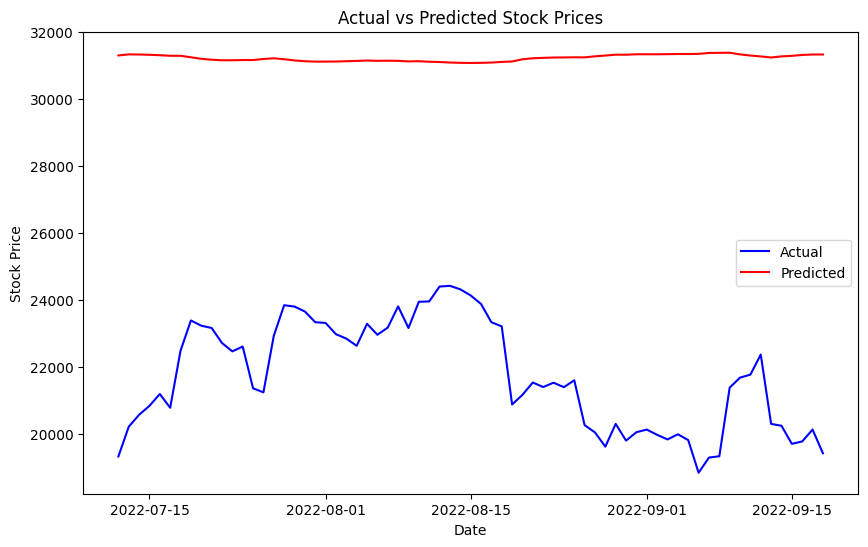

/local_disk0/.ephemeral_nfs/envs/pythonEnv-66d18356-f9f7-4cd2-bf71-ddfa69486083/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


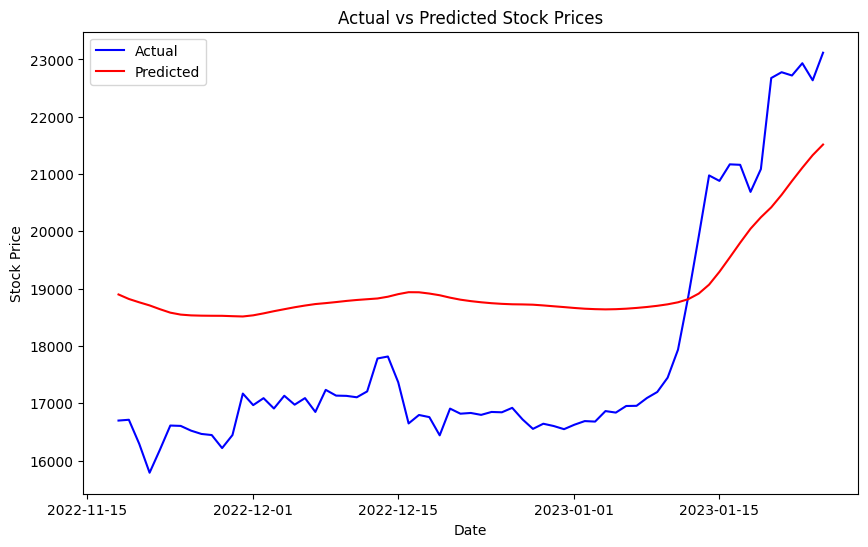

/local_disk0/.ephemeral_nfs/envs/pythonEnv-66d18356-f9f7-4cd2-bf71-ddfa69486083/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


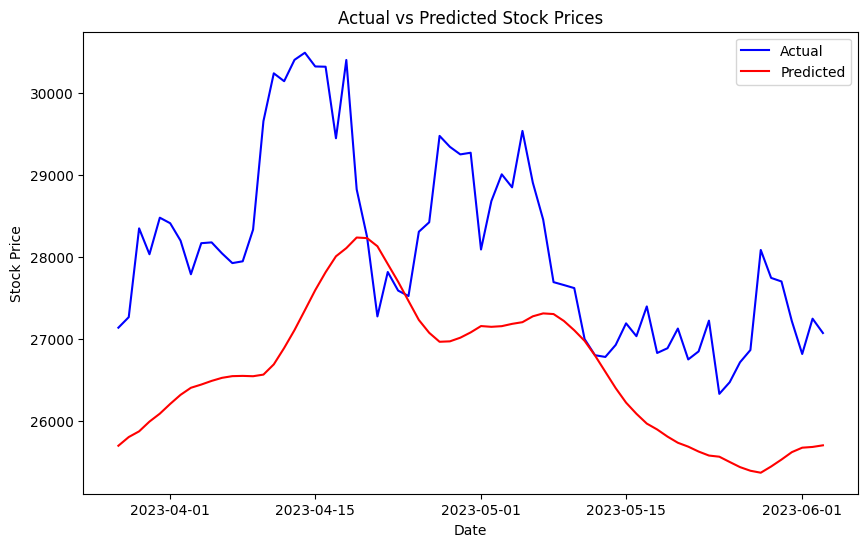

/local_disk0/.ephemeral_nfs/envs/pythonEnv-66d18356-f9f7-4cd2-bf71-ddfa69486083/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


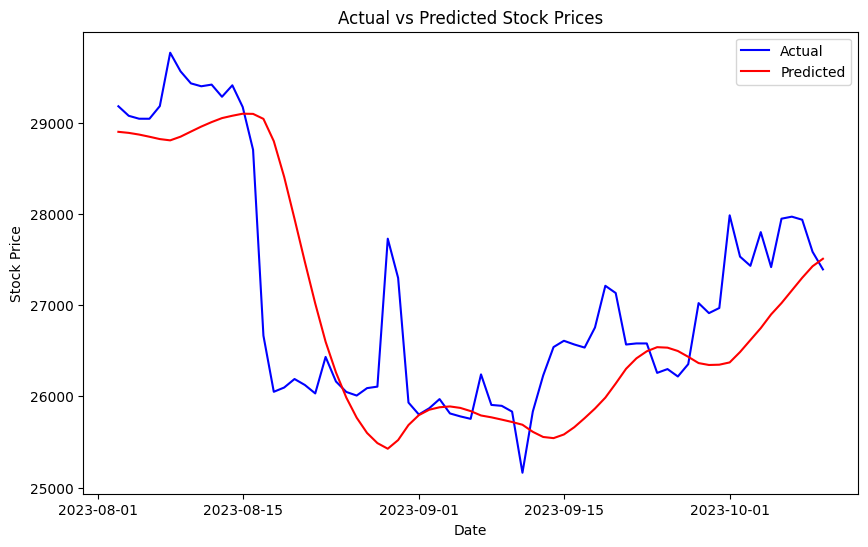

/local_disk0/.ephemeral_nfs/envs/pythonEnv-66d18356-f9f7-4cd2-bf71-ddfa69486083/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


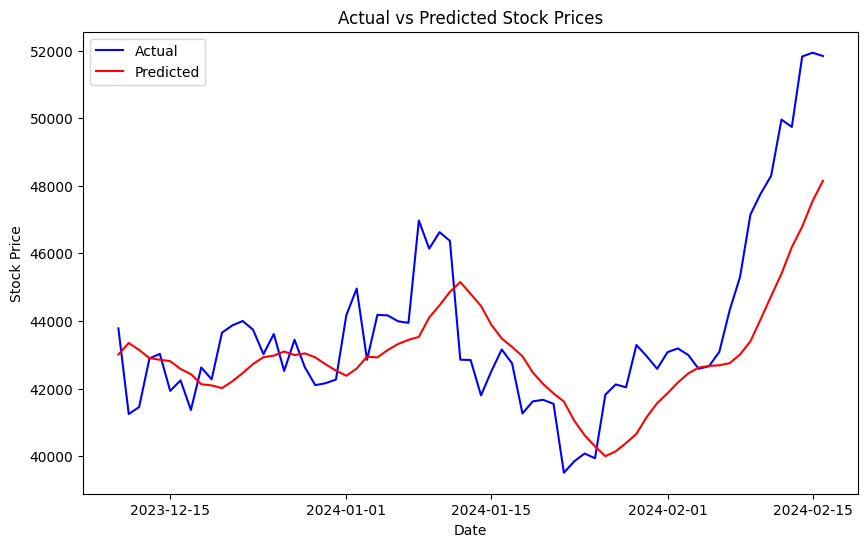

Average MAE: 2973.32
Average MSE: 20736396.77
Average MAPE: 13.10%


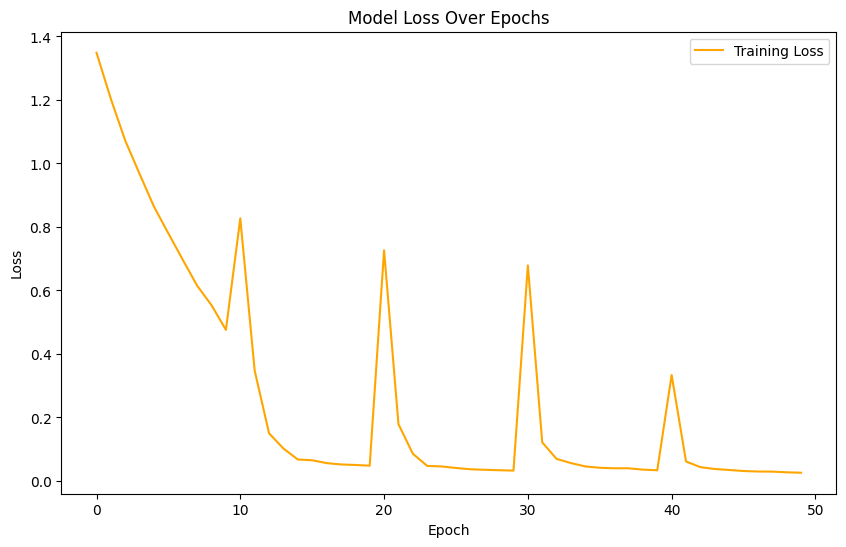

In [0]:
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Number of splits for cross-validation
n_splits = 5  

# Initialize time series cross-validation method
tscv = TimeSeriesSplit(n_splits=n_splits)

# Store error metrics for evaluation
mae_scores = []
mse_scores = []
mape_scores = []

# Normalize the data (LSTM requires scaled data)
scaler = StandardScaler()

# Initialize list to store loss history for plotting convergence
loss_history = []

# Loop through each train-test split
for train_index, test_index in tscv.split(df):
    train, test = df.iloc[train_index], df.iloc[test_index]
    
    # Normalize the training and testing data
    train_scaled = scaler.fit_transform(train[['Close']])
    test_scaled = scaler.transform(test[['Close']])

    # Prepare data for LSTM
    def create_dataset(data, time_step=1):
        X, y = [], []
        for i in range(len(data) - time_step):
            X.append(data[i:(i + time_step), 0])
            y.append(data[i + time_step, 0])
        return np.array(X), np.array(y)

    time_step = 60  # 60 timesteps for the LSTM
    X_train, y_train = create_dataset(train_scaled, time_step)
    X_test, y_test = create_dataset(test_scaled, time_step)

    # Reshape input to be [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=False, input_shape=(time_step, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the LSTM model and store the loss history
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    
    # Append loss history
    loss_history.extend(history.history['loss'])  # Store loss values over epochs
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Inverse transform predictions and actual values
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Compute error metrics
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test, predictions)

    # Store results
    mae_scores.append(mae)
    mse_scores.append(mse)
    mape_scores.append(mape)

    # Plot the historical and forecasted data
    plt.figure(figsize=(10, 6))
    
    # Ensure the test_index matches the length of the predictions
    actual_values = y_test[:len(predictions)]  # Adjust length of y_test
    predicted_values = predictions  # Predictions should have the same length

    plt.plot(df.index[test_index][-len(actual_values):], actual_values, color='blue', label='Actual')
    plt.plot(df.index[test_index][-len(predicted_values):], predicted_values, color='red', label='Predicted')
    plt.title('Actual vs Predicted Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Print evaluation results
print(f"Average MAE: {np.mean(mae_scores):.2f}")
print(f"Average MSE: {np.mean(mse_scores):.2f}")
print(f"Average MAPE: {np.mean(mape_scores):.2f}%")

# Plot the training loss to show convergence
plt.figure(figsize=(10, 6))
plt.plot(loss_history, color='orange', label='Training Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


RobustScaler

/local_disk0/.ephemeral_nfs/envs/pythonEnv-66d18356-f9f7-4cd2-bf71-ddfa69486083/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


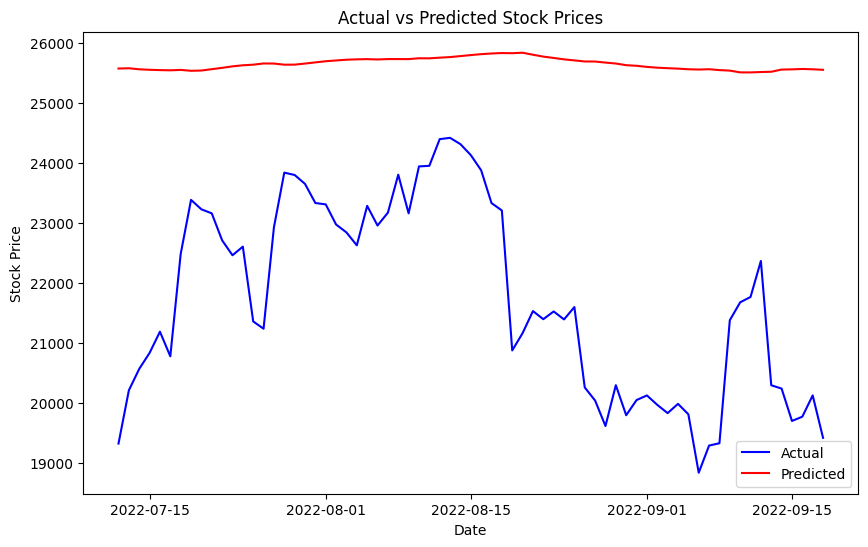

/local_disk0/.ephemeral_nfs/envs/pythonEnv-66d18356-f9f7-4cd2-bf71-ddfa69486083/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


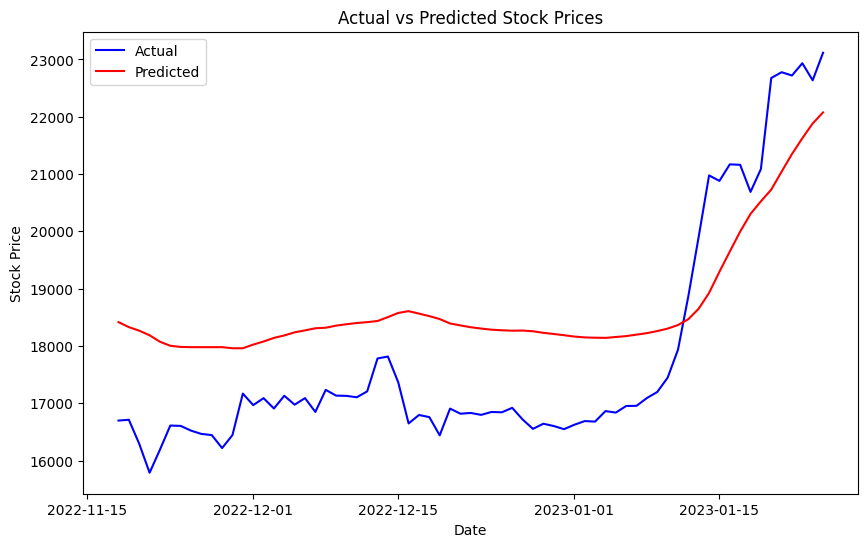

/local_disk0/.ephemeral_nfs/envs/pythonEnv-66d18356-f9f7-4cd2-bf71-ddfa69486083/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


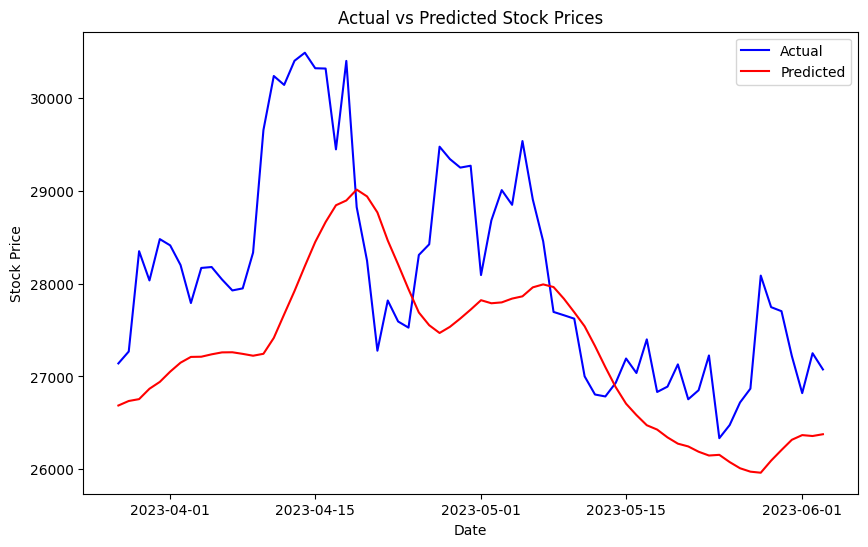

/local_disk0/.ephemeral_nfs/envs/pythonEnv-66d18356-f9f7-4cd2-bf71-ddfa69486083/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


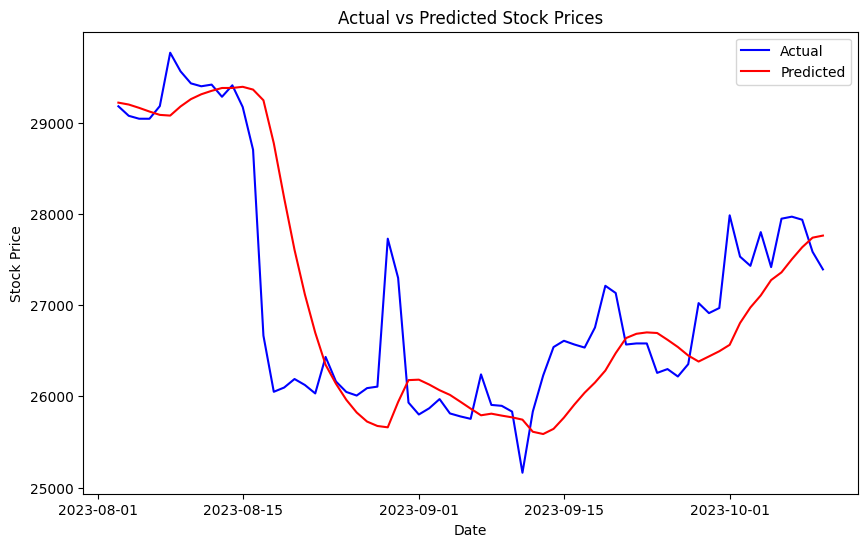

/local_disk0/.ephemeral_nfs/envs/pythonEnv-66d18356-f9f7-4cd2-bf71-ddfa69486083/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


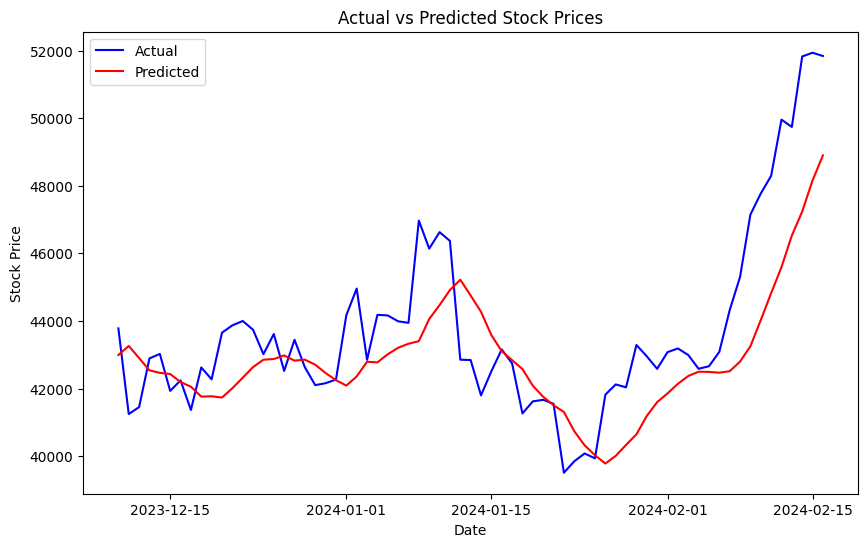

Average MAE: 1637.81
Average MSE: 5026997.80
Average MAPE: 6.98%


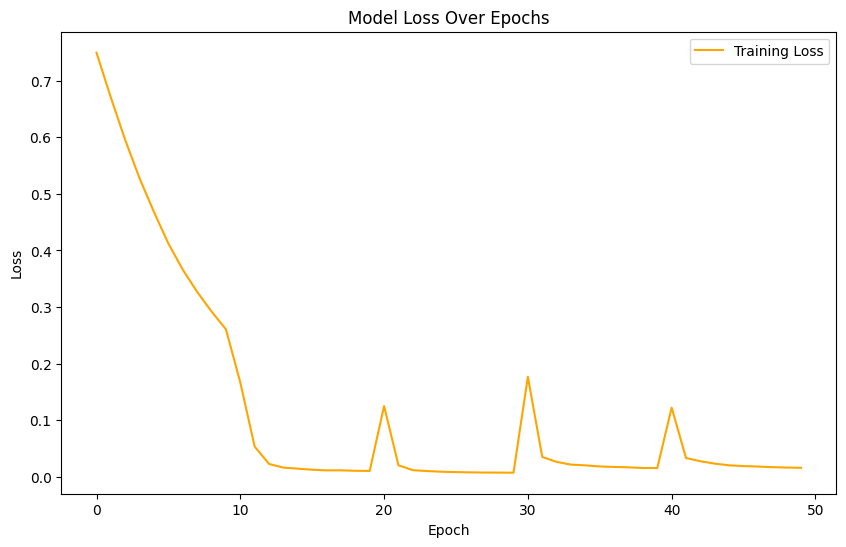

In [0]:
 

import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import RobustScaler

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Number of splits for cross-validation
n_splits = 5  

# Initialize time series cross-validation method
tscv = TimeSeriesSplit(n_splits=n_splits)

# Store error metrics for evaluation
mae_scores = []
mse_scores = []
mape_scores = []

# Normalize the data (LSTM requires scaled data)
scaler = RobustScaler()

# Initialize list to store loss history for plotting convergence
loss_history = []

# Loop through each train-test split
for train_index, test_index in tscv.split(df):
    train, test = df.iloc[train_index], df.iloc[test_index]
    
    # Normalize the training and testing data
    train_scaled = scaler.fit_transform(train[['Close']])
    test_scaled = scaler.transform(test[['Close']])

    # Prepare data for LSTM
    def create_dataset(data, time_step=1):
        X, y = [], []
        for i in range(len(data) - time_step):
            X.append(data[i:(i + time_step), 0])
            y.append(data[i + time_step, 0])
        return np.array(X), np.array(y)

    time_step = 60  # 60 timesteps for the LSTM
    X_train, y_train = create_dataset(train_scaled, time_step)
    X_test, y_test = create_dataset(test_scaled, time_step)

    # Reshape input to be [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=False, input_shape=(time_step, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the LSTM model and store the loss history
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    
    # Append loss history
    loss_history.extend(history.history['loss'])  # Store loss values over epochs
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Inverse transform predictions and actual values
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Compute error metrics
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test, predictions)

    # Store results
    mae_scores.append(mae)
    mse_scores.append(mse)
    mape_scores.append(mape)

    # Plot the historical and forecasted data
    plt.figure(figsize=(10, 6))
    
    # Ensure the test_index matches the length of the predictions
    actual_values = y_test[:len(predictions)]  # Adjust length of y_test
    predicted_values = predictions  # Predictions should have the same length

    plt.plot(df.index[test_index][-len(actual_values):], actual_values, color='blue', label='Actual')
    plt.plot(df.index[test_index][-len(predicted_values):], predicted_values, color='red', label='Predicted')
    plt.title('Actual vs Predicted Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Print evaluation results
print(f"Average MAE: {np.mean(mae_scores):.2f}")
print(f"Average MSE: {np.mean(mse_scores):.2f}")
print(f"Average MAPE: {np.mean(mape_scores):.2f}%")

# Plot the training loss to show convergence
plt.figure(figsize=(10, 6))
plt.plot(loss_history, color='orange', label='Training Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Transformer Model 

try your transformer here and see if model metrics are better than LSTM 